In [1]:
#
# COSC2671 Social Media and Network Analytics
# Assignment 1
# @author Richard Mailhot, 2019
#

# Preprocessing / Exploration

In [2]:
# Json file with tweets stored:

fJsonName = 'ms_tweets.json'

In [3]:
def processTweetNoStemmer(text, tokenizer, stopwords, stemmer):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: tweet text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])



    # remove stopwords, digits
    return [tok for tok in lTokens if tok not in stopwords and not tok.isdigit()]

In [4]:
import sys
import json
import string
from collections import Counter
import nltk



# number of most frequent terms to display
freqNum = 50

# tweet tokeniser to use
tweetTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '...', ':', '@', '…'] 
# we use the popular Porter stemmer
tweetStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()

# open json file and process it tweet by tweet
with open(fJsonName, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tweetText = tweet.get('text', '')
        # tokenise, filter stopwords and get convert to lower case
        lTokens = processTweetNoStemmer(text=tweetText, tokenizer=tweetTokeniser, stopwords=lStopwords, stemmer = tweetStemmer)

        # update count
        termFreqCounter.update(lTokens)

# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))

@mariners: 10173
#truetotheblue: 2641
x: 2155
yusei: 1741
kikuchi: 1540
shutout: 1437
mariners: 1396
first: 1363
complete-game: 1061
️: 921
mlb: 887
’: 865
win: 839
✅: 767
https://t.co/kxrb3wzpvt: 758
@jfral_23: 694
#gomariners: 677
game: 630
@bluejays: 599
pitches: 584
👏: 581
day: 506
get: 504
seager: 463
🔥: 449
blue: 410
that's: 407
series: 404
kyle: 374
⃣: 371
@yuseik18: 363
yeah: 344
@realkingfelix: 333
home: 326
back: 325
jays: 323
since: 320
lead: 311
⚾: 306
maddux: 306
https://t.co/rh…: 303
big: 297
@mlbpipeline: 286
8/: 285
@mlbstats: 277
today: 267
throws: 265
offense: 264
👑: 262
🙌: 259


In [5]:
import matplotlib.pyplot as plt

# construct the x and y values
y = [count for tag, count in termFreqCounter.most_common(freqNum)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.figure(figsize = (15,10))
plt.bar(x, y)
plt.title("Term frequency distribution")
plt.ylabel('# of tweets with term frequency')
plt.xlabel('Term frequency')
plt.savefig("Term_Freq_Dist.png")
plt.show()

<Figure size 1500x1000 with 1 Axes>

In [6]:
def getHashtags(tweet):
    """
    Extracts the associated hashtags of tweet.

    @param tweet: The tweet, which is in the tweepy json format, and which we wish to extract its associated hashtags.

    @returns: list of hashtags (in lower case)
    """
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])

    return [tag['text'].lower() for tag in hashtags]

In [7]:
from collections import Counter
import json


# number of tweets to display
tweetThres = 50

# open file and use Counter to count the number of times the hash tags appears
with open(fJsonName, 'r') as f:
    hashtagsCounter = Counter()
    # for each line in file (which corresponds to a tweet), load it, get the hashtags and insert them into the
    # Counter
    for line in f:
        tweet = json.loads(line)
        hashtagsInTweet = getHashtags(tweet)
        hashtagsCounter.update(hashtagsInTweet)

    for tag, count in hashtagsCounter.most_common(tweetThres):
        print(tag + ": " + str(count))

truetotheblue: 2641
gomariners: 677
mariners: 157
playersweekend: 154
mlb: 103
truetothebue: 77
tbt: 74
thanksforcoming: 73
whereiroot: 72
happyfélixday: 69
thisisrcity: 35
letsgobluejays: 31
mlbtv: 28
bluejays: 27
seattle: 22
minecraftdayatthepark: 20
chattingcage: 19
bluejaysinvade: 16
菊池雄星: 13
endalz: 12
newprofilepic: 12
nwhealthy: 11
longestlistofnighttimewinnersinnorthtexas: 10
raysup: 10
edgarhof: 9
baseball: 8
awesomeaussie: 8
opener: 8
artrav: 8
mincraftdayatthepark: 7
gsm: 7
ranchguy: 7
goms: 6
teamhyphen: 6
dodgers: 5
kingfelix: 5
happyfelixday: 5
toronto: 5
cubs: 4
dbacks: 4
tripleheader: 4
nutsnotes: 4
washington: 4
yankees: 3
phillies: 3
refreshingplays: 3
happybirthday: 3
hbd: 3
water: 3
tmobilepark: 3


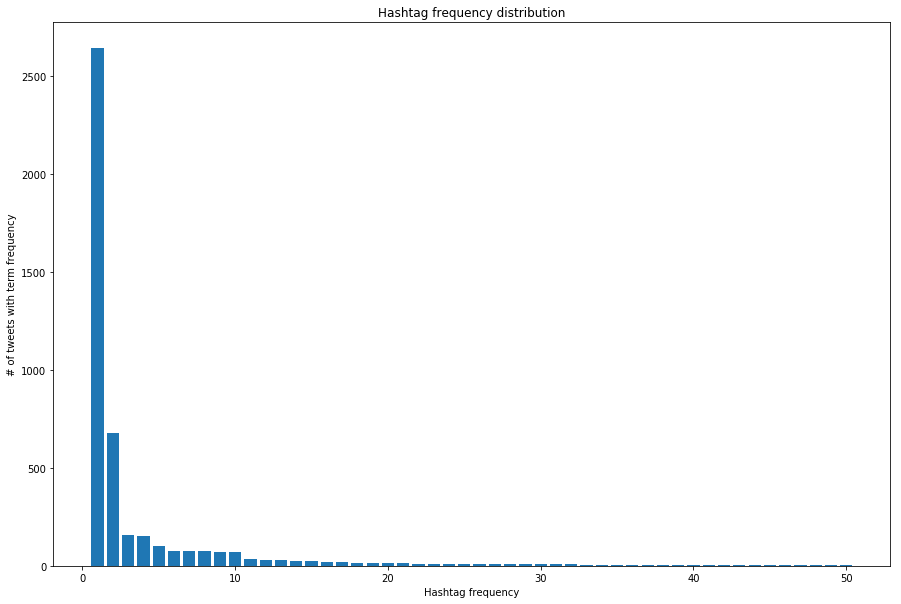

In [8]:
# construct the x and y values for Hashtags
y = [count for tag, count in hashtagsCounter.most_common(freqNum)]
x= range(1, len(y) + 1)


# use matplotlib bar chat to plot this
plt.figure(figsize = (15,10))
plt.bar(x, y)
plt.title("Hashtag frequency distribution")
plt.ylabel('# of tweets with term frequency')
plt.xlabel('Hashtag frequency')
plt.savefig("Hashtag_Freq_Dist.png")
plt.show()

# Sentiment Analysis

In [9]:
# importing packages and nltk data libraries for sentiment analysis
import string
import json
import codecs
import re
import math


import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thisisrickym\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# load the twitter processing python class for use
%load_ext autoreload
%autoreload 1

# we are importing TwitterProcessing.py and its contents
%aimport TwitterProcessing

In [11]:
# We use vader sentiment analysis, as our data is social media related

def vaderSentimentAnalysis(sTweetsFilename, bPrint, tweetProcessor):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param sTweetsFilename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    # open file and process tweets, one by one
    with open(sTweetsFilename, 'r') as f:
        for line in f:
            # each line is loaded according to json format, into tweet, which is actually a dictionary
            tweet = json.loads(line)

            try:
                tweetText = tweet.get('text', '')
                tweetDate = tweet.get('created_at')
                # pre-process the tweet text
                lTokens = tweetProcessor.process(tweetText)

                dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

                lSentiment.append([pd.to_datetime(tweetDate), dSentimentScores['compound']])

                if bPrint:
                    print(*lTokens, sep=', ')
                    for cat,score in dSentimentScores.items():
                        print('{0}: {1}, '.format(cat, score), end='')
                    print()

            except KeyError as e:
                pass


    return lSentiment

In [12]:
# input file of set of tweets (json format)
tweetsFile = 'ms_tweets.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True

approach = 'vader'

In [13]:
# construct the tweet pro-processing object
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']

# call the TwitterProcessing python script
tweetProcessor = TwitterProcessing.TwitterProcessing(tweetTokenizer, lStopwords)

In [14]:
lSentiment = vaderSentimentAnalysis(tweetsFile, flagPrint, tweetProcessor)

seattle, mariners, ’, austin, nola, touches, home, score, ahead, toronto, blue, jays, catcher, reese, mcguire, ’
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@russellhartness, 10pm, 6th, inning, old, man, way, past, bedtime, 7-4, @mariners, #gomariners, #truetotheblue, ht
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, cleats, best, part
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.6369, 
throwing, first, pitch, @mariners, game, unforgettable, experience, air, cannon, worked, perfectly
neg: 0.0, neu: 0.704, pos: 0.296, compound: 0.6369, 
@eitanbenezra, @yankees_beisbol, @mariners, @jesanchez_espn, esas, son, buenas, noticias, siempre, hacen, buenas, transmisiones
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559,

neg: 0.0, neu: 0.262, pos: 0.738, compound: 0.9201, 
@mariners, @bluejays, hey, ken, racist, go
neg: 0.444, neu: 0.556, pos: 0.0, compound: -0.6124, 
@mariners, @tmobilepark
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@shampton06, thaaaaaaaaa, #yankees, win, take, series, 2/3, dodgers, @mariners, ’, coming, 💪, 🏻, 👊, 🏻, 🔥, ⚾, ️
neg: 0.0, neu: 0.703, pos: 0.297, compound: 0.5859, 
thaaaaaaaaa, #yankees, win, take, series, 2/3, dodgers, @mariners, ’, coming, 💪, 🏻, 👊, 🏻, 🔥, ⚾, ️
neg: 0.0, neu: 0.678, pos: 0.322, compound: 0.5859, 
ballgame, @yankees, win, yanks, win, 5-1, take, 2, 3, @dodgers, next, ’, @mariners, let, ’, keep, th
neg: 0.0, neu: 0.591, pos: 0.409, compound: 0.8225, 
@qopbaseball, #mlb, 2019, pitch, quality, leaders, week, 21, curveball, min, 200, pitches, top, 5, #dodgers, rich, hill, 5.70, qopa, #phillies, aaro
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.6597, 
@mariners, remember, gonzo, said, last, year, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bluejays, @mar

@mariners, fearless, #truetotheblue, x, austin, nola
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@mariners, @bluejays, glad, could, keep, ‘, em, seated, 😉
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@jaypers413, george, kirby, 3, ip, 4, h, 1, r, 0, bb, 2, k, yet, give, walk, 23, pro, ip, @everettaquasox, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#icymi, minecraft, day, battle, true, north, concludes, win, final, today, @tmobilepark
neg: 0.151, neu: 0.465, pos: 0.384, compound: 0.6124, 
@mariners, special, minecraft, zombie, throwing, first, pitch, minecraft, day
neg: 0.0, neu: 0.748, pos: 0.252, compound: 0.4019, 
@mariners, #truetotheblue, house, seattle, winning, vs, toronto, sunday, mobile, park, vs, #letsgobluejays
neg: 0.0, neu: 0.764, pos: 0.236, compound: 0.5267, 
@mariners, gonzo, dominated, seven, innings, mariners, take, series, finale, blue, jays, fi

neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
@mannydorrow02, @pazzerbd, @mariners, @lamalam94862771, @sw29qw, u, like, trump
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
@pazzerbd, @trollmariners, @mariners, @lamalam94862771, @sw29qw, follow, u, team, canada, eh, win, let, ’, goooo
neg: 0.0, neu: 0.743, pos: 0.257, compound: 0.5859, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@trollmariners, @pazzerbd, @mariners, @lamalam94862771, @sw29qw, guy, girl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mannydorrow02, @trollmariners, @mariners, @lamalam94862771, @sw29qw, blue, jays, suck
neg: 0.293, neu: 0.707, pos: 0.0, compound: -0.4404, 
@trollmariners, @pazzerbd, @mariners, @lamalam94862771, @sw29qw, real, question, u, guys, like, trump
neg: 0.0, neu: 0.783, pos: 0.217, compound: 0.3612, 
@mannydorrow02, @trollmariners, @mariners, @lamalam94862771, @sw29qw, cmon, follow, maybe, shitty, country, ca
neg: 0.265, neu: 0.735, p

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, fearless, #truetotheblue, x, austin, nola
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@qopbaseball, #mlb, 2019, pitch, quality, ranking, week, 21, location, min, 500, pitches, top, 5, #cubs, kyle, hendricks, #dbacks, mike, leake
neg: 0.0, neu: 0.909, pos: 0.091, compound: 0.2023, 
@mariners, @bluejays, safe, travels, back, home, 👋
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
thx, @realkingfelix, @mariners
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.3612, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
today, ’, crew, @bluejays, v, @mariners, game
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compo

@mariners, 🔥, e, g, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, #bluejaysretreat
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, e, g, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, series, win, #thanksforcoming, 👋
neg: 0.0, neu: 0.441, pos: 0.559, compound: 0.5859, 
@mariners, fearless, #truetotheblue, x, austin, nola
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
@mariners, @tmobilepark, #gomariners, #bluejaysinvade
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, e, g, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mariner, moose, #klo, #hatrack, #seattle, #mariners, #gomariners, @marinermoose, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@chasingzoie, #whereiroot, @mariners, #mincraftdayatthepark
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, goose, shuts, door, gonzo, goes, seven, strong, lift, mariners, series, win, blue, jays, @t
neg: 0.0, neu: 0.562, pos: 0.438, compound: 0.8979, 
@marine

@mariners, mariners, win, goose, shuts, door, gonzo, goes, seven, strong, lift, mariners, series, win, blue, jays, @t
neg: 0.0, neu: 0.562, pos: 0.438, compound: 0.8979, 
yes, magill, save, excellent, work, @mariners, another, series, win, #gomariners, #truetotheblue
neg: 0.0, neu: 0.343, pos: 0.657, compound: 0.9246, 
@rageelixir, hey, guys, ’, going, @mariners, #minecraftdayatthepark, aug, 25th, 😁, tickets, giveaway, wa
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bluejays, fall, @mariners, 3-1, seattle
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, goose, shuts, door, gonzo, goes, seven, strong, lift, mariners, series, win, blue, jays, @t
neg: 0.0, neu: 0.562, pos: 0.438, compound: 0.8979, 
@mariners, mo, dylan, moore, puts, one, bullpen, give, mariners, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mo, yard, work, sunday, afternoon, #truetotheblue, x, dylan, moore
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mo, ya

neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
@mariners, mo, yard, work, sunday, afternoon, #truetotheblue, x, dylan, moore
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@quinnrichter, couple, hours, i'll, fulfilling, dream, throwing, first, pitch, @mariners, game
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.25, 
@mariners, maybe, get, pinch, hit, appearance, today, birthday, boy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, seager, stays, hot, plates, speedy, crawdaddy, give, mariners, 2-0, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mo, yard, work, sunday, afternoon, #truetotheblue, x, dylan, moore
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mo, yard, work, sunday, afternoon, #truetotheblue, x, dylan, moore
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, seager, stays, hot, plates, speedy, crawdaddy, give, mariners, 2-0, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mo, yard, work, su

@77bluejays, ok, @bluejays, make, 2, 3, @mariners, today, #bluejays, #letsgobluejays
neg: 0.0, neu: 0.761, pos: 0.239, compound: 0.296, 
@sportsnet, clay, buchholz, makes, first, start, since, may, 5, return, muscle, strain, upper, back, @bluejays, look
neg: 0.079, neu: 0.921, pos: 0.0, compound: -0.0516, 
#grandesligas, félix, hernández, volvió, al, morrito, omar, narváez, la, volvió, botar, pero, @mariners, cayó, ante
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@fixyourgame2k, @pazzerbd, @mannydorrow02, @trollmariners, @mariners, @lamalam94862771, @sw29qw, okay, know, troll
neg: 0.0, neu: 0.826, pos: 0.174, compound: 0.2263, 
@chasingzoie, #whereiroot, @mariners, #mincraftdayatthepark
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@chasingzoie, #whereiroot, @mariners, #mincraftdayatthepark
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm, t-mobile, park, @mariners, @bluejays, @mariners, seattle, wa
neg: 0.0, neu: 1.0, pos: 0.0

@mariners, hard, imagine, @logangilbert22, first, season, pro, ball, going, much, better, last, night, he's, run, scoreless
neg: 0.077, neu: 0.765, pos: 0.158, compound: 0.3612, 
@apopkajohn, @wekivasports, stetson, university, alum, @logangilbert22, great, first, season, minor, league, ball, @mariner
neg: 0.0, neu: 0.745, pos: 0.255, compound: 0.6249, 
@wekivasports, stetson, university, alum, @logangilbert22, great, first, season, minor, league, ball
neg: 0.0, neu: 0.709, pos: 0.291, compound: 0.6249, 
@77bluejays, ok, @bluejays, make, 2, 3, @mariners, today, #bluejays, #letsgobluejays
neg: 0.0, neu: 0.761, pos: 0.239, compound: 0.296, 
@mariners, gonna, rush, #kelenic, ruin, like, countless, prospects, .., leave, kids, alone
neg: 0.374, neu: 0.374, pos: 0.251, compound: -0.3182, 
@jaypers413, logan, gilbert, 6, ip, 2, h, 0, r, 1, bb, 6, k, @artravs, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@legendarynocon, @mariners, @logangilbert22, insert, justin, dunn
neg: 0.0, neu

@rootsports_nw, miss, interview, @j_rodshow, today, @mariners, pregame, show, 12:30, pm, pt, root, sports, 💻, 📺
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.1531, 
@quinnrichter, @mariners, @minecraft, mwahahah
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jau85311632, @stalinfanacc, @bahlahkaay, @mariners, ’, clearly, one, crying, go, play, outside, ’, good
neg: 0.171, neu: 0.387, pos: 0.442, compound: 0.5994, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rootsports_nw, miss, interview, @j_rodshow, today, @mariners, pregame, show, 12:30, pm, pt, root, sports, 💻, 📺
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.1531, 
@rootsports_nw, miss, interview, @j_rodshow, today, @mariners, pregame, show, 12:30, pm, pt, root, sports, 💻, 📺
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.1531, 
@mariners, final, blue, jays, 7, mariners, 5, marco, gonzales, get, nod, tomorrow, ’, series, finale, right, back, t-mobile, park, fir
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
week, minor, leaguers, ⚾, ️, miss, brand, new, episode, mariners, access, today, 12:00
neg: 0.138, neu: 0.862, pos: 0.0, compound: -0.1531, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
things, went, sour, last, night, @everettaquasox, things, sweet, @mariners, second-rounder
neg: 0.0, neu: 0.75, pos: 0.25, compound: 0.4588, 
@bardown, @mariners, @bluejays, @tworsandtwols, kinda, odd, sign, really, 1st, hes, wrong, sporting, event, 🤨
neg: 0.328, neu: 0.672, pos: 0.0, compound: -0.6565, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@psisports, @magillmlb, @mariners, following, matt, since, came, dodgers, hoping, would, break
neg: 0.0, neu: 0.7

neg: 0.0, neu: 0.634, pos: 0.366, compound: 0.6369, 
@laceypdchief, detective, willams, throws, first, pitch, big, thank, @mariners, community, partners, country, financia
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.3612, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jmsira, felix, hermandez, acaba, de, tener, un, regreso, muy, bueno, la, mlb, con, 5.2, ip, permitiendo, solo, 3, hit, 2, carreras, sucias, 88, lanza
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jmsira, felix, hermandez, acaba, de, tener, un, regreso, muy, bueno, la, mlb, con, 5.2, ip, permitiendo, solo, 3, hit, 2, carreras, sucias, 88, lanza
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#mlb, ⚾, 🇻, 🇪, @realkingfelix, regresará, al, equipo, grande, de, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jmsira, felix, hermandez, acaba, de, tener, un, regreso, muy, bueno, la, mlb, 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@stalinfanacc, @bahlahkaay, @mariners, physical, activity, two, teams, facing, know, sport
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jau85311632, @bahlahkaay, @mariners, okay, bud, ’, tired, af, going, sleep, good, day, night
neg: 0.174, neu: 0.539, pos: 0.287, compound: 0.2263, 
@bardown, @mariners, @bluejays, @tworsandtwols, tell, canada, st, louis
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bahlahkaay, @stalinfanacc, @mariners, 3am, want, kicks, rocks
neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.0772, 
@jau85311632, @stalinfanacc, @katietohawaii, @bahlahkaay, @mariners, point, meaningless, squabbling
neg: 0.293, neu: 0.707, pos: 0.0, compound: -0.4404, 
@jau85311632, @vaakszn, @stalinfanacc, @bahlahkaay, @mariners, wowwww, ’, say, never, saw, coming, lmao
neg: 0.239, neu: 0.761, pos: 0.0, compound: -0.4847, 
@stalinfanacc, @bahlahkaay, @mariners, oh, man, guess, enough, people, text, know, typo
neg: 0.0, neu: 1.0, pos: 0.0, comp

@mannydorrow02, @marinersrealist, @mariners, true, haniger, healy, dl, gordon's, fine, i'm, expert, b
neg: 0.0, neu: 0.662, pos: 0.338, compound: 0.5574, 
@stalinfanacc, @jau85311632, @bahlahkaay, @mariners, wonder, blue, jays, fans, park, park, 🤔
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@trollmariners, @mariners, @lamalam94862771, @pazzerbd, @sw29qw, lose, 7-5, jays
neg: 0.278, neu: 0.722, pos: 0.0, compound: -0.4019, 
@jau85311632, @bahlahkaay, @mariners, least, country, actually, exists, lol, canada, ’, exist
neg: 0.0, neu: 0.763, pos: 0.237, compound: 0.4215, 
@bahlahkaay, @stalinfanacc, @mariners, lack, comebacks, mariners, never, taste, world, series
neg: 0.204, neu: 0.796, pos: 0.0, compound: -0.3182, 
@mannydorrow02, @mariners, @lamalam94862771, @pazzerbd, @sw29qw, u, get, jersey
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@tacotimenw, @seahawks, thank, 3, crisp, taco, free, lunch, tuesday, @mariners, kicking, coupl
neg: 0.0, neu: 0.608, pos: 0.392, compound: 0.7003, 
@b

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
last, night, ballpark, til, next, year, see, ya, soon, @mariners, 💙, thanks, home, away, home
neg: 0.0, neu: 0.818, pos: 0.182, compound: 0.4404, 
@dartguynation, @stevepa93110808, @bardown, @tsn_sports, @mariners, @bluejays, @tworsandtwols, iq, level
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, big, knock, narvy, #truetotheblue, x, omar, narváez
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@waycooljr62, @marinersrealist, @mariners, ’, fat, af, ’, rely, field, either
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, noelvi, marte, went, 2, 2, 2, doubles, today, dsl, #mariners, ’, season, finale, finish, 309, 371, 511, line
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @artravs, @mariners, @gregjohnsmlb, @rainiersland, @modeston

@alecdietz, pregame, read, @rainiersland, gets, going, vegas, braden, bishop, lineup, leadoff, spot, lacerat
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@marinersassist, @mariners, somebody, coming, they're, getting, crazier, second, games, almost
neg: 0.109, neu: 0.891, pos: 0.0, compound: -0.0258, 
@mariners, make, moose, thing, rally, time, take, page, @angels, rally, monkey, know
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jmsira, felix, hermandez, acaba, de, tener, un, regreso, muy, bueno, la, mlb, con, 5.2, ip, permitiendo, solo, 3, hit, 2, carreras, sucias, 88, lanza
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@phill_bone, #playersweekend, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
question, many, jays, fans, seattle, right, wow, @bluejays, @mariners, #letsgobluejays
neg: 0.0, neu: 

@danielkruschke_, @regalchicken, @wonder1369, @mariners, real, prospects, ’, spend, anywhere, near, much, time, vogey
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@safeco330, met, high, fived, guy, arquimedes, caminero, @mariners, road, jersey, said, canada, love
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.6369, 
@floydflashback, @bardown, @mariners, @bluejays, @tworsandtwols, lol, brag, raps, seems, fair
neg: 0.0, neu: 0.611, pos: 0.389, compound: 0.6249, 
@safeco330, @mariners, saw, unicorn
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, game, #felixhernandez, pitched, tonight, king, back, #kingfelix, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, big, knock, narvy, #truetotheblue, x, omar, narváez
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@safeco330, met, high, fived, guy, arquimedes, caminero, @mariners, road, jersey, said, canada, love
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.6369, 
@mariners, got, heem, 👑, #truetotheblue, x, félix,

@ddevries03, mean, @mariners, winning, ’, think, exciting
neg: 0.0, neu: 0.377, pos: 0.623, compound: 0.765, 
goes, well, @bluejays, baseball, drinking, old, seattle, lager, @maritimepacific, @mariners, —
neg: 0.0, neu: 0.811, pos: 0.189, compound: 0.2732, 
@mariners, back, top, 🙌, narvy, comes, three-run, home, run, give, mariners, lead, #gomariners
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@mariners, back, top, 🙌, narvy, comes, three-run, home, run, give, mariners, lead, #gomariners
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@mariners, got, heem, 👑, #truetotheblue, x, félix, hernández
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, back, top, 🙌, narvy, comes, three-run, home, run, give, mariners, lead, #gomariners
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@mariners, catcher, tandem, incredible, season, #narvy, #themurph, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, back, top, 🙌, narvy, comes, three-run, home, run, gi

welcome, @bluejays, @mariners, game
neg: 0.0, neu: 0.5, pos: 0.5, compound: 0.4588, 
@bardown, @mariners, @bluejays, @tworsandtwols, canadians
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
happy, félix, day, @realkingfelix, @mariners
neg: 0.0, neu: 0.519, pos: 0.481, compound: 0.5719, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hey, @mariners, @bluejays, hat, trick, well-done, whole, lot, befuddled, cannucks, 😂, 😂, 😂
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.0516, 
#bluejayshattrick, 😂, 😂, well, done, @mariners
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.2732, 
’, @mariners, fan, know, ’, root, @bluejays, young, core, really, exciting
neg: 0.0, neu: 0.547, pos: 0.453, compound: 0.6997, 
jays, fans, @bluejays, home, game, @mariners, @russellhartness, hiding, ’, fans, @sodomojofs
neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.296, 
@donald1996_, @mariners, ’, believe, jinxes, still, knew
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@schaaptop, @marin

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @bi_disaster__, 💙, 💙, 💙
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, look, good, feel, good, #playersweekend
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.7003, 
everybody, drop, right, king, felix, currently, throwing, perfect, game, 2, innings, @mariners
neg: 0.142, neu: 0.608, pos: 0.25, compound: 0.3818, 
someone, please, explain, black, white, @mariners, vs, @bluejays, game, ’, restaurant, sound
neg: 0.0, neu: 0.813, pos: 0.187, compound: 0.3182, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@twins, @yankees, @dodgers, @royals, @redsox, @braves, @mariners, @rockies, @dbacks, @whitesox, @cubs, @indians, @tigers, @reds
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, return, king, 👑
neg: 0.0, neu: 1.0, p

@russellhartness, welcome, back, felix, 1, .., 2, .., 3, 1st, inning, books, @mariners, @realkingfelix
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4588, 
#truetotheblue, go, ’, @mariners, @pbrown503, @nepheadcase, @g_miller89
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
welcome, back, felix, 1, .., 2, .., 3, 1st, inning, books, @mariners, @realkingfelix
neg: 0.0, neu: 0.75, pos: 0.25, compound: 0.4588, 
@mariners, logan, gilbert's, breaking, stuff, 🤢, goes, tonight, @artravs, looking, build, stretch, landed
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@alecdietz, @rainiersland, @mariners, @thenewstribune, @smithlm12, plan, bishop, go, full, nine, innings, tonight, point
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rainiersland, @mariners, @thenewstribune, @smithlm12, plan, bishop, go, full, nine, innings, tonight
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, king, félix, takes, mound, time, play, ball, #gomariners, 🏟, ️, @tmobilepark, 📺, @rootsports_nw, 📻, 770, ktth, 💻

neg: 0.0, neu: 0.762, pos: 0.238, compound: 0.3612, 
@mariners, king, félix, returns, mound, mariners, take, blue, jays, game, two, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
el, duelo, 97, de, la, historia, entre, lanzadores, venezolanos, en, @mlb, wilmer, font, los, @bluejays, retan, al, “, rey, ”, felix
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
happy, 21st, birthday, emily, ouellette, love, #mariners, #whereiroot, #truetotheblue, #gomariners, @mariners
neg: 0.0, neu: 0.533, pos: 0.467, compound: 0.836, 
dear, @mariners, neighbour, north, cheering, home, team
neg: 0.0, neu: 0.459, pos: 0.541, compound: 0.7096, 
@mariners, king, félix, returns, mound, mariners, take, blue, jays, game, two, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, king, félix, returns, mound, mariners, take, blue, jays, game, two, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, bringing, electricity, ⚡, @flashgjr, hit, safely, 17, last, 19, games, batt

@mariners, one, game, ’, feared, hitters, aaron, judge
neg: 0.348, neu: 0.652, pos: 0.0, compound: -0.4939, 
@1chron28_9, crew, th, @mariners, game, tonight, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#mlb, 2019, pitch, quality, leaders, week, 21, curveball, min, 200, pitches, top, 5, #dodgers, rich, hill, 5.70, qopa
neg: 0.0, neu: 0.735, pos: 0.265, compound: 0.6597, 
let, ’, go, @bluejays, beat, @realkingfelix, @mariners, tonight, 👍, 🏻, 👏, 🏻, 💪, 🏻, ⚾, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
future, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jfral_23, officially, made, #mariners, fan, @mariners, get, fraley, jersey
neg: 0.0, neu: 0.777, pos: 0.223, compound: 0.3182, 
@rootsports_nw, @mariners, crawdaddy, @jp_crawford, face, blue, jays, game, two, series, tonight, @rootsports_nw, #refreshingpl
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, p

@mariners, last, night, enjoyable, let's, tonight, huh, #truetotheblue, x, @xfinity
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
lets, go, mariners, rfc, #truetotheblue, @mariners, @reignfc, #bebold
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@stuivailala, @mariners, pitched, great, last, night, first, time, seeing, live
neg: 0.0, neu: 0.687, pos: 0.313, compound: 0.6249, 
@mariners, much, 🔥, get, up-close, look, stories, behind, best, #playersweekend, gear, 👟, htt
neg: 0.0, neu: 0.704, pos: 0.296, compound: 0.6369, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.2755, 
@mariners, love, vogey's, bat
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.6369, 
@mariners, @bluejays, probably, 👇
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@br_mlb, every, angle, jp, crawford, play, incredible, 😱, @mariners
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4939, 
@mariners, much, 🔥, get, up-close, look, stor

hi, @mariners, time, today, ’, game, start, tickets, say, 7:10, pm, ’, seeing, 6:10, pm, online, thanks
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
@kenjennings, picking, fight, @bluejays, fans, go, seattle, west, coast, swing, play
neg: 0.186, neu: 0.643, pos: 0.171, compound: -0.0516, 
@mariners, august, ’, #nwhealthy, spotlight, @chifranciscan, ’, hanaa, abou, ouf, md, mariners, hall, famer, dan, wilson, share, importa
neg: 0.0, neu: 0.872, pos: 0.128, compound: 0.296, 
@angiementink, ⁦, @mariners, ⁩, let, us, players, weekend, thanks, much, jerseys, chris, prieto, omar, narvaez, —
neg: 0.0, neu: 0.805, pos: 0.195, compound: 0.4404, 
@mariners, @bluejays, ohhhh, #mariners, throwing, major, shade, #bluejays, bad, boos, probably, louder, cheers, #jays2ndhome
neg: 0.188, neu: 0.645, pos: 0.167, compound: -0.1027, 
@remark204, nice, thanks, ⁦, @mariners, ⁩
neg: 0.0, neu: 0.26, pos: 0.74, compound: 0.6908, 
@bardown, @tsn_sports, @mariners, @bluejays, @tworsandtwols, teams, suck

neg: 0.074, neu: 0.545, pos: 0.381, compound: 0.7251, 
@bardown, @mariners, @bluejays, @tworsandtwols, ya, 25, cups, row, mostly, canadian, hockey, players, think
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@marinersstore, @mariners, would, love, ⚡, ️, jersey, one, favorite, jerseys, one, favorite, player
neg: 0.0, neu: 0.44, pos: 0.56, compound: 0.8807, 
@bardown, @tsn_sports, @mariners, @bluejays, @tworsandtwols, dumb, maple, leafs, jets, get, soon, wi
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.5106, 
@bardown, @tsn_sports, @mariners, @bluejays, @tworsandtwols, meanwhile, 16, canadian, players, st, louis, year, cup
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbazfallleague, @mariners, @jkelenic_1019, @peoriasportscom, mariners, play, fallball
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.34, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@stevepa93110808, @bardown, @tsn_sports, @mariners, @bluejays, @tworsandtwols, seattle, getting, hoc
neg: 0.0

@mlb, @stuivailala, @mikebfree5, @magillmlb, @mariners, @indians, ｓｈｉｎｄｏ, genuine, google, ｄｅｓｉｇｎ, ．, ｉｔ, wanna, ｓｅｋａｉｉｃｈｉ, 天才, 。
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bignasty6oh4, @mariners, blue, jays, canada, ’, team
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, last, night, enjoyable, let's, tonight, huh, #truetotheblue, x, @xfinity
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
@mariners, canada, ’, baseball, team, ’
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlb, @stuivailala, @mikebfree5, @magillmlb, @mariners, @indians, sonics, 🔥, 🔥, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, last, night, enjoyable, let's, tonight, huh, #truetotheblue, x, @xfinity
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
@mariners, @xfinity, go, m's, true, blue
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
@mlb, @lamarr_pierre, @stuivailala, 

@hoodiejudge99, @mariners, @brewers, @seattle_09, @sdes17burner, gee, thanks, lmaoooo
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
@mariners, mariners, win, mariners, kick, players, ’, weekend, 7-4, win, blue, jays, behind, big, blasts, narvy, craw
neg: 0.0, neu: 0.648, pos: 0.352, compound: 0.8225, 
@mariners, enjoyable, visit, neighbors, let's, tomorrow, 📰
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
@mariners, stop, winning
neg: 0.333, neu: 0.152, pos: 0.515, compound: 0.296, 
@mariners, @brewers, @mzzzzzzzzzlfc, @seattle_09, @sdes17burner, ’, welcome, benny, gamel
neg: 0.0, neu: 0.7, pos: 0.3, compound: 0.4588, 
@mariners, far, enthusiastic, wave, year, taking, place, right, @tmobilepark, 🤔, 🤔, 🤔
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.4939, 
@mariners, wild, pitches, water, flows, towards, plate, 🌧, ️, 🌧, ️, 🌧, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, comes, austin, toronto, folk, always, get, little, wild, visit, ballpark
neg: 0.0, neu: 1.0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@darraldc, @mariners, @bluejays, @teresabarnette, thanks, dc, appreciate, great, tips
neg: 0.0, neu: 0.382, pos: 0.618, compound: 0.8658, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbazfallleague, mlb, ’, #23, overall, prospect, jarred, kelenic, @mariners, playing, peoria, javelinas, 27, days
neg: 0.0, neu: 0.733, pos: 0.267, compound: 0.4588, 
@mariners, 👀
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rbicru7, @battersboxcards, josh, got, early, trade, night, 44, bust, @topps, sterling, hit, monster, @jkelenic_1010, superfr
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsnet, tonight, @mlb, sportsnet, @bluejays, vs, @

@rootsports_nw, home, run, omar, narvaez, gets, @mariners, board, we're, tied, @rootsports_nw, thanks, part, fi
neg: 0.0, neu: 0.818, pos: 0.182, compound: 0.4404, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ok, @bluejays, beat, @mariners, tonight, #bluejays, #letsgobluejays
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.296, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@ucf_banneret, new, podcast, show, #174, summer, cram, session, @ucf_football, news, @ucf_msoccer, preview, w, @coachcalabrese, @ucf_volle
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jp_crawford, “, smell, marketing, ”, —, ron, darling
neg: 0.0, neu: 0.568, pos: 0.432, compound: 0.5859, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@lvjayc, @chadbec82312937, @mariners, booth, leftovers
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, far, enthusia

@sportsnet, every, season, thousands, flock, t-mobile, park, watch, @bluejays, take, @mariners, ’, become, annual, tradi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.2755, 
@mariners, ✌, ️, laser, ✌, ️, #truetotheblue, x, @jp_crawford
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, crawdaddy, crawdaddy, cheap, 👋, ⚾
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoyable, visit, neighbors, let's, tomorrow, 📰
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
@mariners, top, sheff, makes, first, major, league, start, mariners, look, open, homestand, dub, 🗒, ️
neg: 0.0, neu: 0.87, pos: 0.13, compound: 0.2023, 
@alzassociation, happiest, birthdays, @mariners, outfielder, @bradenbishop7, thank, helping, #endalz, honor, mother
neg: 0.0, neu: 0.366, pos: 0.634, compou

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ✌, ️, laser, ✌, ️, #truetotheblue, x, @jp_crawford
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, that's, start, homestand, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, #happyfélixday, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, dear, god, ’, beautiful
neg: 0.0, neu: 0.104, pos: 0.896, compound: 0.8225, 
black, @mariners, jerseys, tho, 🔥, 🔥, 🔥, #playersweekend
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoyable, visit, neighbors, let's, tomorrow, 📰
neg: 0.0, neu: 0.633, pos: 0.367,

@mariners, fireworks, singalong, coolest, thing, ’, ever, seen, game, ’, watching
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mariners, huge, fail, getting, @tmobilepark, tonight, cyclist, info, blocked, fireworks, 💥, ’
neg: 0.376, neu: 0.47, pos: 0.154, compound: -0.5106, 
@timhackney, @mariners, ’, playing, tonight, game, 👍, 🏻
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
@mariners, mariners, win, mariners, kick, players, ’, weekend, 7-4, win, blue, jays, behind, big, blasts, narvy, craw
neg: 0.0, neu: 0.648, pos: 0.352, compound: 0.8225, 
@mariners, ✌, ️, laser, ✌, ️, #truetotheblue, x, @jp_crawford
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, mariners, kick, players, ’, weekend, 7-4, win, blue, jays, behind, big, blasts, narvy, craw
neg: 0.0, neu: 0.648, pos: 0.352, compound: 0.8225, 
@mariners, that's, start, homestand, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, always, true, blue, except, weekend, 😂, 😂, well, done
neg: 0

@mariners, every, single, argument, #playersweekend, uniforms, effectively, countered, doggos, #truetotheblue, x, @jp
neg: 0.174, neu: 0.625, pos: 0.201, compound: 0.1027, 
mlb, final, score, mariners, 54-74, defeat, blue, jays, 52-78, home, 7-4, mar, 02101300, r, 7, h, 12, e, 1, blu, 2010010, 0, r
neg: 0.167, neu: 0.833, pos: 0.0, compound: -0.4588, 
hey, @bluejays, invasion, going, far, asking, friend, #gomariners, enjoy, best, fireworks, baseb
neg: 0.0, neu: 0.459, pos: 0.541, compound: 0.891, 
@mariners, jays, bullpen, sucks
neg: 0.455, neu: 0.545, pos: 0.0, compound: -0.3612, 
@mariners, mariners, win, mariners, kick, players, ’, weekend, 7-4, win, blue, jays, behind, big, blasts, narvy, craw
neg: 0.0, neu: 0.648, pos: 0.352, compound: 0.8225, 
@mariners, mariners, win, mariners, kick, players, ’, weekend, 7-4, win, blue, jays, behind, big, blasts, narvy, craw
neg: 0.0, neu: 0.648, pos: 0.352, compound: 0.8225, 
@mariners, mariners, win, mariners, kick, players, ’, weekend, 7-4, w

@russellhartness, @mariners, thankfully, tomorrow's, game, little, earlier, we'll, going, home
neg: 0.0, neu: 0.763, pos: 0.237, compound: 0.4215, 
@terris_bueller, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.2755, 
@russellhartness, 10pm, 6th, inning, old, man, way, past, bedtime, 7-4, @mariners, #gomariners, #truetotheblue, ht
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@papermakersarmy, @mariners, happy, see, @padres, putting, something, delicious
neg: 0.0, neu: 0.448, pos: 0.552, compound: 0.8126, 
high, @bluejays, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, @mariners, left
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, 10pm, 6th, inning, old, man, way, past, bedtime, 7-4, @mariners, #gomariners, #truetotheblue, ht
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, 10pm, 6th, inni

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, cleats, made, walking
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🗣, ️, walk, way, ball, four, mariners, lead
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, we'll, take
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, we'll, take, em, anyway, get, em
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
atta, boy, kyle, seager, walk, drives, run, 5-4, @mariners, lead
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
blistering, @mariners, @bluejays, game, clip, 30, min, per, inning, come, @mlb
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@joncupo, @bluejaysmemes, @marinermoose, @bluejays, @mariners, nothing, sends, joy, watching, 400, ball, clubs, go
neg: 0.204, neu: 0.796, pos: 0.0, compound: -0.4717, 
@joncupo, @marinermoose, @bluejays, @mariners, ’, fight, jon, beef
neg: 0.302, neu: 0.698, pos: 0.0, compound: -0.3818, 
black, uniform, @mariners, looks, goooood
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@

@mariners, @tmobilepark, live, mile, away, can't, feel, @athletics
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, 🔥, 🔥, #playersweekend, x, @danielvogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ✌, ️, laser, ✌, ️, #truetotheblue, x, @jp_crawford
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, crawdaddy, crawdaddy, cheap, 👋, ⚾
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, need, jersey
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@seattlekim, @mariners, @tmobilepark, many, people, hate, wave
neg: 0.381, neu: 0.619, pos: 0.0, compound: -0.5719, 
@mariners, far, enthusiastic, wave, year, taking, place, right, @tmobilepark, 🤔, 🤔, 🤔
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.4939, 
@mariners, far, enthusiastic, wave, year, taking, place, right, @tmobilepark, 🤔, 🤔, 🤔
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.4939, 
@ma

neg: 0.174, neu: 0.625, pos: 0.201, compound: 0.1027, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, bounceback, frame, 👊, let's, get, runs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@darkasgardian91, @mariners, @stuivailala, ’, one, know, lol
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
@mariners, kyle, seager, hot, right, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, here's, many, many, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
go, 3, games, less, week, bust, retired, @mariners, sport, color, @jamberrynails, jams
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@usaninjawarrior, thanks, making, @hyphen18, #hyphenninja, #awesomeaussie, @mariners, #trueto

@bluejays, @mariners, tied, 3-3, 3, innings, play
neg: 0.0, neu: 0.676, pos: 0.324, compound: 0.34, 
@mariners, every, single, argument, #playersweekend, uniforms, effectively, countered, doggos, #truetotheblue, x, @jp
neg: 0.174, neu: 0.625, pos: 0.201, compound: 0.1027, 
@mariners, sorry, @mariners, ’, dodgers, fan, heart, 💙
neg: 0.171, neu: 0.526, pos: 0.303, compound: 0.25, 
free, tickets, first-time, wolf, winner, jimmy, azle, 4, pack, @rangers, vs, @mariners, 8/, 31, globe, lif
neg: 0.0, neu: 0.647, pos: 0.353, compound: 0.7964, 
@mariners, kyle, seager, hot, right, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
’, even, like, @mariners, hat, cute, 😎
neg: 0.0, neu: 0.353, pos: 0.647, compound: 0.6705, 
black, @mariners, uniforms, 😳, 🔥, 🔥, #goms
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
seager, remains, hot, 2b, scores, crawford, 3-3, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg

@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.2755, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.2755, 
anyway, ’, mariners, game, love, summarise, ex, trash, ’, hot, love, @skrillex, love, @mariners
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.9274, 
@mariners, nothing, like, first, major, league, knock, #truetotheblue, x, @jfral_23
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.2755, 
@mariners, @jfral_23, mariners, cant, even, beat, poverty, franchise
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4023, 
@harbourcats, 2017, @harbourcats, player, year, @shane_mcguire21, catching, brother, reese, @bluejays, @mariners, tonight
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, close, home, runs, hit, foul, pole, #playersweekend, count, six, kid, kid
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nothi

@sportsnet, western, canadians, rejoice, trent, thornton, @bluejays, t-mobile, park, take, @mariners, friday, evening
neg: 0.0, neu: 0.805, pos: 0.195, compound: 0.4404, 
@smithlm12, @mariners, acuna, might, something, say
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@angiementink, ⁦, @mariners, ⁩, let, us, players, weekend, thanks, much, jerseys, chris, prieto, omar, narvaez, —
neg: 0.0, neu: 0.805, pos: 0.195, compound: 0.4404, 
@smithlm12, @mariners, least, ’, leading, something, season, 👍, 🏾, ’, take
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, row, 40, 40, folks, going, b4, ab, guy, stealing, 2nd, ’, add, 20, year, season, ticket, holder
neg: 0.188, neu: 0.812, pos: 0.0, compound: -0.5719, 
@mariners, need, know, who's, wearing, moana, maui, shoes
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, earth, ’, go, seat, pitches, batters, usher, ’, get, everyone
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
inspiration, @bluejays, uniform, tonight's, game, #bluejays

@milb, loves, hitting, dingers, kelenic, loves, hitting, dingers, @jkelenic_1019, @mariners, @artravs, ➡, ️, :/
neg: 0.128, neu: 0.479, pos: 0.394, compound: 0.7184, 
@am1150, @bluejays, @mariners, go, jays
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
’, worry, @mariners, fans, ’, game, tonight, grew, michigan, miles, north, peo
neg: 0.244, neu: 0.756, pos: 0.0, compound: -0.4404, 
@bluejays, set, lead-off, @mariners, seattle, listen, live, 1150
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
seattle, mariners, @mariners, ⚾, we're, back, vancity, 🇨, 🇦, let's, 🍺, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
go, @bluejays, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsnet, every, season, thousands, flock, t-mobile, park, watch, @bluejays, take, @mariners, ’, become, annual, tradi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, look, good, feel, good, #playersweekend
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.7003, 
every, season, thousands, flo

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsnet, @bluejays, @mariners, 7, 10, pm, pt, 8:, 10, pm, pt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @artravs, @mariners, @gregjohnsmlb, @rainiersland, @modestonuts, :)
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, top, sheff
neg: 0.0, neu: 0.526, pos: 0.474, compound: 0.2023, 
@mariners, top, sheff, makes, first, major, league, start, mariners, look, open, homestand, dub, 🗒, ️
neg: 0.0, neu: 0.87, pos: 0.13, compound: 0.2023, 
jarred, kelenic, hr, 19, @artravs, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @danielvogelbach, horrible, jerseys, year, @mariners
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.5423, 
@mariners, 🔥, 🔥, 🔥, #playersweekend, x, @danielvogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@naturallykatz, omg, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
canadians, go, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@angiementink, @marin

@mariners, 🔥, 🔥, 🔥, #playersweekend, x, @danielvogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
representing, ⁦, @montreal_expos, ⁩, ⁦, @mlb, ⁩, game, ⁦, @mariners, ⁩, ⁦, @bluejays, ⁩, #expos
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, 🔥, 🔥, #playersweekend, x, @danielvogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, 🔥, 🔥, #playersweekend, x, @danielvogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@notcascadiacoug, @tmobilepark, @mariners, bc'ers, #bluejays, fans, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@seanlocations, @mariners, ’, happening, go, blue, jays
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, time, cook, 👨, ‍, 🍳, #truetotheblue, x, @topsheff42
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#theprogram, @andrewwalker650, @scottrintoul, 4pm, @doinitbiggio23, #bluejays, #mariners, 530, @dshulman_espn
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsnet, tonight, @mlb, sportsnet, @bluejays, vs, @ma

@mariners, time, cook, 👨, ‍, 🍳, #truetotheblue, x, @topsheff42
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, time, cook, 👨, ‍, 🍳, #truetotheblue, x, @topsheff42
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @topsheff42, players, weekend, jersey, name
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@wydlv182, @tworsandtwols, @mariners, 🤙, 🤙, 🤙
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@ken_rosenthal, former, #sfgiants, @mariners, continue, clean, house
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
@william_liira, @tworsandtwols, @mariners, 💯
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, 🔥, 🔥, #playersweekend, x, @danielvogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @bluejays, pretty, crazy, saw, last, week, everything, go, well, trip, la, looking, forward
neg: 0.128, neu: 0.588, pos: 0.283, compound: 0.4404, 
@seanlocations, @mariners, retrospect, probably, ’, used, gre

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
planning, heading, south, weekend, #toronto, @bluejays, #seattle, @mariners, #tripleheader
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@yankees, claimed, corey, gearrin, waivers, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@tworsandtwols, hope, ’, sitting, behind, home, plate, @mariners, @tmobilepark, upgrade
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
@mariners, look, custom, sleep, sack, grandma, made, heard, guys, might, need, model, #newmarinersfan
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@tworsandtwols, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, guess, mariners, player, plans, rock, moana, cleats, #playersweekend, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
best, luck, @mariners, fans, stadium, invaded, raucous, canadians, watch, @bluejays, ’, fu
neg: 0.236, neu: 0.402, pos: 0.362, compound: 0.3612, 
@tworsandtwols, @mariners, important, work, 🙏
neg: 0.0, neu: 0.625, pos: 0.375, c

@mariners, love, shack, baby, love, shack
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.8555, 
@outsports, count, happened, least, four, gay, couples, women, since, 2000, least, three, times
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
5pm, @3hl1045, announce, grand, prize, winner, call, bigs, trip, send
neg: 0.0, neu: 0.409, pos: 0.591, compound: 0.8779, 
props, @spokaneindians, zero, waste, 2022, campaign, 1st, program
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.4215, 
@mariners, albuquerque, weird, al, yankovic
neg: 0.298, neu: 0.702, pos: 0.0, compound: -0.1779, 
@mariners, canada
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, song, play, belting, every, single, word, 🎟, ️
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.34, 
@mariners, adam, sandler's, medium, pace
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, heart, go
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, song, play, belting, every, single, word, 🎟, ️
neg: 0.0, neu: 0.714, pos: 0.286, com

got, nola, shirt, #custommade, @mariners, austin.nola, seattle, washington
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, final, rays, 7, mariners, 6, mariners, fall, rays, series, finale, return, home, winning, road, trip
neg: 0.0, neu: 0.793, pos: 0.207, compound: 0.5267, 
@mariners, ’, ballgame, offense, leads, charge, mariners, take, game, two, rays, lock, third, stra
neg: 0.143, neu: 0.857, pos: 0.0, compound: -0.25, 
@mariners, félix, returns, mound, saturday, loud, king's, court, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@zoyapunk, @icyprop, concur, live, close, kent, cuz, commutes, awful, course, go, @mariners
neg: 0.214, neu: 0.786, pos: 0.0, compound: -0.4588, 
🇨, 🇦, streaming, #peacharch, 5, #seattle, @bluejays, home, games
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
watch, @chrislowry17, live, seattle, weekend, @bluejays, vs, @mariners, #teamcanada, #kelowna, #mlb
neg: 0.0, neu: 1.0, p

neg: 0.0, neu: 0.718, pos: 0.282, compound: 0.6249, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbazfallleague, @mariners, @jkelenic_1019, @peoriasportscom
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, like, bio, update, 👍, 🏻
neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rageelixir, @mariners, awww, kids, would, ’, loved, fun, 😊, 👍, 🏻
neg: 0.0, neu: 0.41, pos: 0.59, compound: 0.802, 
@mariners, ⛰, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, see, tomorrow, 👨, ‍, 🍳, @topsheff42, @artravs, 2.19, era, 85, 18, bb, 78.0, ip
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rootsports_nw, congrats, @jfral_23, making, mlb, debut, wednesda

@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@spencer_thomas3, @mariners, still, better, 4, starters, put
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
@budicorn, @mariners, cough, cough, scott, servais
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, use, king's, house, yall, kicked
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, can't, wait, see, saturday, #truetotheblue, #canadianmsfan, #notajaysfan
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@whlsilvertips, players, turned, @mariners, pitchers, #howboutthemfrogs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@msbq, @lavaliant, @mariners, got, @vancouvertitans, jersey, exactly, reason
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🤦, 🏻, ‍, ♂, ️, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @baseballuga, @jimcallismlb

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@trollmariners, @mariners, get, jersey
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@trippybatman, @mariners, @garygun77, possibly, person, remaining, who's, responsible, wasting, felix, career, felix, hernandez
neg: 0.169, neu: 0.688, pos: 0.144, compound: -0.1027, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@budicorn, @mariners, probably, get, jersey
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, know, seattle, love, dawgs, 🐺, happy, birthday, husky-turned-mariners-outfielder, @bradenbishop7
neg: 0.0, neu: 0.47, pos: 0.53, compound: 0.836, 
@mariners, mostly, saturday
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@garygun77, @regalchicken, @mariners, walkoff, wins, decisions, starting, pitchers
neg: 0.0, neu: 0.654, pos: 0.346, compound: 0.5719, 
@mariners, ten, o'clock, eve, day, good, time, enjoy, nastiness, logan, gilbert, te

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, think, lost, game, 1-0
neg: 0.365, neu: 0.635, pos: 0.0, compound: -0.3182, 
@mariners, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@kuffel_blake, @mlbpipeline, @baseballuga, @jimcallismlb, @tigers, @orioles, @angels, @whitesox, @mariners, @reds, @cubs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @baseballuga, @jimcallismlb, @tigers, @orioles, @angels, @whitesox, @mariners, @reds, @cubs, @beckjason
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, whose, 🏠, #tbt
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rootsports_nw, congrats, @jfral_23, making, mlb, debut, wednesday, jake, @mariners, back, home, tomorrow, open, series, aga
neg: 0.0, neu: 0.805, pos: 0.195, compound: 0.5267, 


@page_ahead_, join, @mariners, care, paccar, bringing, new, children, ’, books, cash, donations, tuesday, august, 27th, game
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.6597, 
found, gem, thrifting, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
join, @mariners, care, paccar, bringing, new, children, ’, books, cash, donations, tuesday, august, 27th, game
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.6597, 
@tacotimenw, free, mexi-fries, double, dip, jp, crawford, mallex, smith, hit, triples, @mariners, yesterday, registered, #ttnwap
neg: 0.0, neu: 0.718, pos: 0.282, compound: 0.6249, 
@mariners, @slong895, happy, birthday, shed, god, bless
neg: 0.0, neu: 0.317, pos: 0.683, compound: 0.8225, 
@big_showfan, @mlbazfallleague, @mariners, @jkelenic_1019, @peoriasportscom, prestigious, top, pr
neg: 0.0, neu: 0.795, pos: 0.205, compound: 0.2023, 
@mariners, @bradenbishop7, cannot, wait, rec, specs, back, lives, happy, birthday, well, @slong895
neg: 0.0, neu: 0.633, pos: 0.367, compou

@mlbazfallleague, mlb, ’, #23, overall, prospect, jarred, kelenic, @mariners, playing, peoria, javelinas, 27, days
neg: 0.0, neu: 0.733, pos: 0.267, compound: 0.4588, 
@mlbazfallleague, mlb, ’, #23, overall, prospect, jarred, kelenic, @mariners, playing, peoria, javelinas, 27, days
neg: 0.0, neu: 0.733, pos: 0.267, compound: 0.4588, 
@mlbpipeline, @baseballuga, @jimcallismlb, @tigers, @orioles, @angels, @whitesox, @mariners, @reds, @cubs, @beckjason
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, see, tomorrow, 👨, ‍, 🍳, @topsheff42, @artravs, 2.19, era, 85, 18, bb, 78.0, ip
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, see, tomorrow, 👨, ‍, 🍳, @topsheff42, @artravs, 2.19, era, 85, 18, bb, 78.0, ip
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dear, @mariners, canadian, m's, fan, heading, weekend, i'd, like, apologize, advance, uncou
neg: 0.0, neu: 0.476, pos: 0.524, compound: 0.7783, 
@mlbazfallleague, mlb, ’, #23, overall, prospect, jarred, kelenic, @mariners, playi

@mariners, know, seattle, love, dawgs, 🐺, happy, birthday, husky-turned-mariners-outfielder, @bradenbishop7
neg: 0.0, neu: 0.47, pos: 0.53, compound: 0.836, 
@mariners, @bradenbishop7, cannot, wait, rec, specs, back, lives, happy, birthday, well, @slong895
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.7003, 
realized, yesterday, football, season, almost, underway, time, wear, @lavaliant, jersey, school, every, b
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @bradenbishop7, cannot, wait, rec, specs, back, lives, happy, birthday, well, @slong895
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.7003, 
@mariners, know, seattle, love, dawgs, 🐺, happy, birthday, husky-turned-mariners-outfielder, @bradenbishop7
neg: 0.0, neu: 0.47, pos: 0.53, compound: 0.836, 
@alzassociation, happiest, birthdays, @mariners, outfielder, @bradenbishop7, thank, helping, #endalz, honor, mother
neg: 0.0, neu: 0.366, pos: 0.634, compound: 0.9022, 
@mariners, @bradenbishop7, cannot, wait, rec, specs, back, 

@ucf_banneret, new, podcast, show, #174, summer, cram, session, @ucf_football, news, @ucf_msoccer, preview, w, @coachcalabrese, @ucf_volle
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yeah, @mariners, keep, shit, seattle
neg: 0.409, neu: 0.341, pos: 0.25, compound: -0.34, 
@mariners, ten, o'clock, eve, day, good, time, enjoy, nastiness, logan, gilbert, texas, league, p
neg: 0.115, neu: 0.549, pos: 0.335, compound: 0.6124, 
new, episode, @everettherald, sports, podcast, week's, episode, features, pat, dillon, @aquasoxradio
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@matthewkevinj, @mariners, @majorminnesota, ideas, wife, brings, home, middle, school, fortnit
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@corbittmaybe, @mariners, @majorminnesota, getting, ideas, kids, newscast, middle, school, sub, :)
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4588, 
@mariners, ten, o'clock, eve, day, good, time, enjoy, nastiness, logan, gilbert, texas, league, p
neg: 0.115, neu: 0.549, pos: 0.335

yeah, @snetcampbell, called, weekend, western, canadian, love, fest, @bluejays, play, @mariners, represent, #mlb
neg: 0.0, neu: 0.532, pos: 0.468, compound: 0.8316, 
@mariners, matter, unforgettable, day, jake, fraley, 📰
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.0258, 
@mariners, nasty, stuff, he's, throwing
neg: 0.474, neu: 0.526, pos: 0.0, compound: -0.5574, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@waldo9939, @vandalfootball, mock, scrimmage, 🏈, @vandalssoccer, ready, open, season, ⚽, ️, @seahawks, bunch, rookies, @mariner
neg: 0.183, neu: 0.654, pos: 0.163, compound: -0.0772, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@statsbystats, @mlbrandomstats, @heygoldy, literally, talked, @mariners, broadcast, yesterday, lol
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.4215, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, actio

@mariners, matter, unforgettable, day, jake, fraley, 📰
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.0258, 
@paytonberens, @mariners, take, note, take, money
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, matter, unforgettable, day, jake, fraley, 📰
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.0258, 
@mariners, matter, unforgettable, day, jake, fraley, 📰
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.0258, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, matter, unforgettable, day, jake, fraley, 📰
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.0258, 
@mariners, take, note, take, money
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, matter, unforgettable, day, jake, fraley, 📰
neg: 0.0, neu: 0.82, pos: 0.

@mariners, félix, returns, mound, saturday, loud, king's, court, 👑
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@astrostalk, hi, got, foul, ball, game, vs, @mariners, friday, 8/, 2/2019, worth, authenticated, somehow
neg: 0.0, neu: 0.872, pos: 0.128, compound: 0.2263, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
justin, dunn, 6, ip, 4, h, 2, r, 2, bb, 7, k, @artravs, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, @jfral_23, congrats, de, jake
neg: 0.0, neu: 0.541, pos: 0.459, compound: 0.5267, 
@mariners, @xflseattle, 🤔
neg: 0.0, neu: 1.0, pos: 0.0, compound: 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@jaypers413, juan, low-a, debut, 6, ip, 3, h, 1, r, 1, bb, 6, k, @wv_power, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
#rt, @xfl2020, @mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.727, pos: 0.273, compound: 0.4588, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, welcome, 𝟮𝟬𝟲, @xflseattle, 🐉, 🐲, see, action, february, 🏈
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, @xflseattle, ’, welcome, sonics, though
neg: 0.0, neu: 0.571, pos: 0.429, compound: 0.4588, 
@mariners, @tacotimenw, waaaaaaaaaahhhhh, working, day, tomorrow, there's, location, near
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, making, things, happen, first, day, office, 😤, #truetothebue, x, jake, fraley
neg: 0.0, neu: 1.0, pos: 0.0, compo

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, hawt, corner, 🔥, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, making, things, happen, first, day, office, 😤, #truetothebue, x, jake, fraley
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@regalchicken, @seahawksforever, @kidclutchthe1, @mariners, casual
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
@rainiersland, shout-out, jake, fraley, got, ride, wave, make, major, league, debut, @mariners, today, congrats
neg: 0.0, neu: 0.793, pos: 0.207, compound: 0.5267, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@godawgs999, @dustinackleyfan, @boltscupszn, @mariners, ah, yes, classic, “, rebuild, ”, response, let, ’, start, calling
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@seahawksforever, @kidclutchthe1, @m

neg: 0.279, neu: 0.721, pos: 0.0, compound: -0.4767, 
@mariners, thor, catch
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@ian_mcmian, @troy_beer30, @7of69, @xfl2020, @xflseattle, obviously, @mariners, fan, 😂, 😂, 😂
neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.3182, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mlb, #mlb, @raysbaseball, 7, @mariners, 6, #rays, vs, #mariners, #raysup, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rainiersland, shout-out, jake, fraley, got, ride, wave, make, major, league, debut, @mariners, today, congrats
neg: 0.0, neu: 0.793, pos: 0.207, compound: 0.5267,

@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@youwonscience, @mariners, useless, scrub
neg: 0.483, neu: 0.517, pos: 0.0, compound: -0.4215, 
@mariners, wow, wow, wtf
neg: 0.306, neu: 0.081, pos: 0.613, compound: 0.5859, 
@mariners, great, comeback, guy, kept, trash, ass, pitcher, game, fire
neg: 0.347, neu: 0.412, pos: 0.241, compound: -0.2023, 
@mariners, guys, suck, ’, close, one, huh, weak
neg: 0.537, neu: 0.463, pos: 0.0, compound: -0.7003, 
@mariners, making, things, happen, first, day, office, 😤, #truetothebue, x, jake, fraley
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, @raysbaseball, avoid, disastrous, situation, swept, home, @mariners, win, dramatic, style, r
neg: 0.311, neu: 0.357, pos: 0.332, compound: 0.1027, 
@mariners, time, dick, tease, one, appreciate
neg: 0.496, neu: 0.265, pos: 0.239, compound: -0.4404, 
@mariners, let's, move, onto, next, #mariners, game, better, instead
neg: 0.0, neu: 0.

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
absolute, garbage, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, postgame, show, starts, @710espnseattle, tune, takeaways, interviews, 📻
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bullpens, deux, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, way, geaux, @jfral_23, jfra
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@gaetasportsmgt, #gsm, stud, seattle, @mariners, rhp, prospect, @hutchie4995, w, 🔥, start, last, night, going, 7, ️, ⃣, innings, surrendering, 1, run
neg: 0.0, neu: 0.864, pos: 0.136, compound: 0.296, 
@mariners, making, thi

@russellhartness, vogelbach, another, hr, one, run, game, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
vogelbach, another, hr, one, run, game, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, kelenic, vog, ’, new, big, 3, 🔥
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, making, things, happen, first, day, office, 😤, #truetothebue, x, jake, fraley
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, making, things, happen, first, day, office, 😤, #truetothebue, x, jake, fraley
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, vogel, 💣, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, making, things, happen, first, day, office, 😤, #truetothebue, x, jake, fraley
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, vogel, 💣, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, making, things, happen, first,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, coming, clutch, 🙌, tim, lopes, plates, pair, runs, give, mariners, 3-2, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, enjoy, big, day, jake, 👏, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
@mariners, 🔥, hawt, corner, 🔥, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sethbling, turns, sunday, minecraft, day, @mariners, game, seattle, i'm, going, meet'n'g
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @ryandivish, @mariners, @gregjohnsmlb, @rainiersland, @artravs, @modestonuts, @wv_power, @everettaquasox
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, thanks, j, p, crawford's, triple, snag, free, order, mexi-fries, tomorrow, @tacotimenw, download, app
neg: 0.0, neu: 0.617, pos: 0.383, compound: 0.

@mariners, road, trip, recap, 👇, det, series, win, tor, series, win, tb, series, win, one, tomorrow, back, home, 2, ️, ⃣, 0, ️, ⃣
neg: 0.0, neu: 0.551, pos: 0.449, compound: 0.9081, 
@mariners, crawford, triple, start, 4th, seager, ground, right, side, score, 2-1, rays
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @mariners, @gregjohnsmlb, @rainiersland, @artravs, @modestonuts, @wv_power, @everettaquasox, time, score, guys
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, continued, launch, long, ball, another, big, night, trop, #truetotheblue, recap
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, official, —, félix, rejoins, mariners, rotation, saturday, 👑, save, spot, king's, court, 🎟, ️
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
@round2app, @lokationnation, another, babe, ruth, joined, 600, hr, club, 1931, closest, player, joining, ruth
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ’, ballgame, offense, leads, charge, mari

mariners, already, done, enough, allowing, us, tie, rays, ’, tough, task, win, today, w
neg: 0.098, neu: 0.654, pos: 0.248, compound: 0.5106, 
@mariners, @xfinity, trade
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@aaronq13fox, @xflseattle, done, xfl, lets, talk, @mariners, @seahawks, something, @petecarroll
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@keiteay, @ryandivish, @shannondrayer, @mariners, kuma, sighting, first, outing, season, yomiuri, giants, farm, team, stru
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, kyle, seager, 8, ️, ⃣, home, runs, august, —, tied, month, ever, still, plenty, time, top, mark
neg: 0.0, neu: 0.878, pos: 0.122, compound: 0.2023, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🤟, 🏻, #ubhornsup
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, jake, fraley, gets, start, center, big, league, debut, mariners, wrap, east, coast, swing, #gomariners
neg: 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
all-time, @mariners, squad, complete, 96, felix, reasonably, priced
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
like, @mariners, low, key, mainly, shorty, ken, griffey, jr, favorite, baseball, player
neg: 0.127, neu: 0.542, pos: 0.331, compound: 0.5267, 
@reds, @padres, coming, hour, ’, looking, forward, seeing, @mariners, @raysbaseball
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
⚾, ️, #mlb, nota, 📝, félix, hernández, regresa, la, rotación, de, los, @mariners, el, fin, de, semana, el, venezolano, permitió
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mlb, early, targets, @paydirt_dfs, riding, tommy, pham's, hot, streak, includes, 71, dkfp, past, five, games
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
combining, two, #mlb, games, pick, afternoon, higher, run, total, 1st, three, innings, @whitesox
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @xfinity, hope, kyle, seager, keeps, going, find, new, next, year, get, chance, get


@mariners, road, trip, recap, 👇, det, series, win, tor, series, win, tb, series, win, one, tomorrow, back, home, 2, ️, ⃣, 0, ️, ⃣
neg: 0.0, neu: 0.551, pos: 0.449, compound: 0.9081, 
@mariners, get, know, newest, member, mariners, 👀, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, road, trip, recap, 👇, det, series, win, tor, series, win, tb, series, win, one, tomorrow, back, home, 2, ️, ⃣, 0, ️, ⃣
neg: 0.0, neu: 0.551, pos: 0.449, compound: 0.9081, 
@mariners, ’, ballgame, offense, leads, charge, mariners, take, game, two, rays, lock, third, stra
neg: 0.143, neu: 0.857, pos: 0.0, compound: -0.25, 
@mariners, tom, murphy, ⚾, 🚀, two-run, blast, gives, mariners, 6-4, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@waldo9939, @wsucougarsoccer, high, expectations, ⚽, ️, 5, players, could, impace, @vandalfootball, team, 🏈, @kalan_reed11, gets, another
neg

neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.5106, 
@mariners, ’, hot, record, already, bad, ’, late, season, matter, 🤷, ‍, ♂, ️
neg: 0.33, neu: 0.566, pos: 0.104, compound: -0.5267, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@995thewolfdfw, another, name, #longestlistofnighttimewinnersinnorthtexas, amy, midlothian, 4, pack, tickets, @rang
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@artravs, special, congrats, former, #artrav, @jfral_23, called, @mariners, today, remember, us, famous, 👋, htt
neg: 0.0, neu: 0.643, pos: 0.357, compound: 0.7269, 
another, name, #longestlistofnighttimewinnersinnorthtexas, amy, midlothian, 4, pack, tickets
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, continued, launch, long, ball, another, big, night, trop, #truetotheblue, recap
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sethbling, turns, sunday, minecraft, day, @mariners, game, seattle, i'm, going, meet'n'g
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@zakburnsfm, @mariners, fraley, mariners, uniform, spring, training, one, two, weird
neg: 0.159, neu: 0.841, pos: 0.0, compound: -0.1779, 
@mariners, ’, ballgame, offense, leads, charge, mariners, take, game, two, rays, lock, third, stra
neg: 0.143, neu: 0.857, pos: 0.0, compound: -0.25, 
@mariners, ’, ballgame, offense, leads, charge, mariners, take, game, two, rays, lock, third, stra
neg: 0.143, neu: 0.857, pos: 0.0, compound: -0.25, 
@nfb, @espn, @reds, @raysbaseball, @twins, @pirates, @rangers, @redsox, @mets, @cubs, @athletics, @phillies, @nationals, @royals
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
three, @mariners, stories, row, featuring, current, players, team's, uniforms, weird, year
neg: 0.145, neu: 0.855, pos: 0.0, compound: -0.1779, 
@ryandivish, @hyphen18, @mariners, @bluejays, ’, divish, covering, mariners, pretend, loves
neg: 0.116, neu: 0.579, pos: 0.306, compound: 0.5106, 
@garyhilljr, @mariners, 2, teams, playoffs, gu

@badelunas, max, @thearmfarm, done, incredible, job, leading, charge, year, building, relationships, trust, carrying
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.5106, 
@mariners, tom, murphy, ⚾, 🚀, two-run, blast, gives, mariners, 6-4, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, touch, em, tom, #truetotheblue, x, tom, murphy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, hot, hot, 🔥, 🔥, 🔥, kyle, plates, another, run, extend, mariners, lead, 7-4, #gomariners
neg: 0.0, neu: 0.866, pos: 0.134, compound: 0.1779, 
@russellhartness, wait, minute, kyle, seager, hit, another, homerun, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@politicalsuicyd, @mariners, hate, franchise, also, piss, every, single, day, letting, felix, throw
neg: 0.39, neu: 0.61, pos: 0.0, compound: -0.7506, 
@mariners, touch, em, tom, #truetotheblue, x, tom, murphy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@chippsanders, @mariners, gives, 7, runs, cares, 20, games, w

@hyphen18, @mariners, @bluejays, awesome, boss, looking, forward, hearing, booth, see, sheff's, retur
neg: 0.0, neu: 0.728, pos: 0.272, compound: 0.6249, 
@mariners, mariners, win, offense, jumped, early, lead, ’, look, back, mariners, 9-3, win, rays, #truetothe
neg: 0.097, neu: 0.534, pos: 0.369, compound: 0.765, 
@russellhartness, tom, murphy, another, homerun, 6-4, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@hyphen18, excited, booth, friday, night, sheffield, ’, return, @mariners, v, ’, @bluejays
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.34, 
@mariners, hot, hot, 🔥, 🔥, 🔥, kyle, plates, another, run, extend, mariners, lead, 7-4, #gomariners
neg: 0.0, neu: 0.866, pos: 0.134, compound: 0.1779, 
@mariners, hot, hot, 🔥, 🔥, 🔥, kyle, plates, another, run, extend, mariners, lead, 7-4, #gomariners
neg: 0.0, neu: 0.866, pos: 0.134, compound: 0.1779, 
@garyhilljr, @mariners, come, jason, castro
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, announce, king's, court, s

@mariners, knotted, 4-4, sixth, let's, get, back, #gomariners, due, 🔹, seager, 🔹, murphy, 🔹, narváez
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sethbling, turns, sunday, minecraft, day, @mariners, game, seattle, i'm, going, meet'n'g
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
prospects, @mets, dealt, cano-diaz, deal, they're, thriving, #seattle, @mariners
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.296, 
@maxbballin1, @mariners, @realbradadam, #ouryear
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@savagedipoto, @mariners, yea, jerk, guy, tryin, ruin, team, celebration, spite
neg: 0.578, neu: 0.422, pos: 0.0, compound: -0.8625, 
@mariners, let's, play, ball, ❗, ❗, ❗, mariners, vs, rays, starts, 🏟, ️, tropicana, field, 📺, @rootsports_nw, 📻, @710espnseattle, 💻
neg: 0.0, neu: 0.821, pos: 0.179, compound: 0.34, 
@mariners, 🗣, ️, yahtzee
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, seags, back, wall, ☄, ️, mariners, jump, top, early, homer, second, night, row
neg: 0.0, n

@mariners, let's, play, ball, ❗, ❗, ❗, game, one, vs, rays, starts, 🏟, ️, tropicana, field, 📺, @rootsports_nw, 📻, @710espnseattle, 💻
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.34, 
@rootsports_nw, miss, @mariners, versus, rays, today, 3:30, pm, pt, root, sports, ⚾, ️, 📺, #whereiroot, #truetotheblue
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.1531, 
@mariners, franchise
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@flbaseballranch, 2018, first, rounder, #ranchguy, @logangilbert22, dominant, @mariners, farm, system, worked, way
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, seags, back, wall, ☄, ️, mariners, jump, top, early, homer, second, night, row
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, seags, back, wall, ☄, ️, mariners, jump, top, early, homer, second, night, row
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@joshhortonedh, former, @everettaquasox, bern

@mariners, 🗣, ️, yahtzee
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🗣, ️, yahtzee
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@artravs, @fraleybaseball, @jfral_23, @mariners, congratulations, jake
neg: 0.0, neu: 0.562, pos: 0.438, compound: 0.5994, 
@mariners, seags, back, wall, ☄, ️, mariners, jump, top, early, homer, second, night, row
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
wow, @raysbaseball, going, camera, angle, positioning, broadcast, immersive, experience, hea
neg: 0.0, neu: 0.703, pos: 0.297, compound: 0.5859, 
@mariners, seags, back, wall, ☄, ️, mariners, jump, top, early, homer, second, night, row
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@mariners, get, know, newest, member, mariners, 👀, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, seags, back, wall, ☄, ️, mariners, jump, top, early, homer, second, night, row
neg: 0.0, neu: 0.859, pos: 0.141, compound: 0.2023, 
@mariners, seags, back, wall, ☄, 

@mariners, anything, get, peoples, butts, stadium, .., lol, m's, ..
neg: 0.0, neu: 0.763, pos: 0.237, compound: 0.4215, 
@mariners, official, —, félix, rejoins, mariners, rotation, saturday, 👑, save, spot, king's, court, 🎟, ️
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
@mariners, oh, good, watch, give, 7, runs, ask, “, still, rotation, ”, hear
neg: 0.0, neu: 0.756, pos: 0.244, compound: 0.4404, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, get, know, newest, member, mariners, 👀, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🐴, 🐝
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, unfortunately, make, happy
neg: 0.296, neu: 0.247, pos: 0.457, compound: 0.3182, 
@mariners, get, know, newest, member, mariners, 👀, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, sure, get, netting, installed, fro

@joshhortonedh, former, @everettaquasox, bernie, martinez, @bernardomtz44, undrafted, pitcher, university, incarnate, word
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, get, know, newest, member, mariners, 👀, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@michaelfrank29, @connormbogart23, @baseballamerica, @mariners, @jfral_23, @rainiersland, @artravs, @tjcotterill
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, believe, meant, geaux, time, 😉
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@joshhortonedh, former, @everettaquasox, bernie, martinez, @bernardomtz44, undrafted, pitcher, university, incarnate, word
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@joshhortonedh, former, @everettaquasox, bernie, martinez, @bernardomtz44, undrafted, pitcher, university, incarnate, word
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, 

@mariners, get, know, newest, member, mariners, 👀, #truetotheblue, x, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@hunterhamsr, @mariners, @jfral_23, @donaldfnewton, wondering, @lsubaseball, posted, pic, early, mornin
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@chris_krouch, @mariners, anticipated, debut, seattle, baseball, stadium, since, ken, griffey, jr
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@drjessemorse, @mariners, placed, domingo, santana, il, right, elbow, inflammation, rtp, 2-4, weeks, @thefantasydrs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, way, go, @jfral_23
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @jfral_23, @donaldfnewton, @hookedonqwack
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, geauxing, geauxing, gone, 👋, ⚾, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, tom, murphy, got, party, started, mariners, offense, look, back, big, night, trop, #truetotheblue, x, @xfi
neg: 0.113, neu: 0.734, pos: 0.153, compound: 0.1779, 
@mariners, @jfral_23, @mariners, forgot, add, #lsumlb
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, tom, murphy, austin, nola, lead, charge, offense, explodes, nine, runs, series, opener, final, 9-3, #truetothe
neg: 0.118, neu: 0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, promote, jake, fraley, organizations, 8, top, prospect, welcome, show, #gomariners, #truetotheblue
neg: 0.0, neu: 0.422, pos: 0.578, compound: 0.8225, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@joshhortonedh, former, @everettaquasox, bernie, martinez, @bernardomtz44, undrafted, pitcher, university, incarnate, word
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go-time, get, @jfral_23, 📰
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@stuivailala, @mariners, ’, welcome, hope
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
@mariners, @lsubaseball, @jfral_23, #geauxgetemjake
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@lelandta

@mariners, seven, years, ago, today, king, perfect, 👑, watch, 27, outs
neg: 0.0, neu: 0.709, pos: 0.291, compound: 0.5719, 
@joshhortonedh, former, @everettaquasox, bernie, martinez, @bernardomtz44, undrafted, pitcher, university, incarnate, word
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
going, @mariners, game, sunday, join, @soundtransit, tailgating, event, #puyallup, station, prior, ga
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, 53-73
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
happy, 59th, birthday, former, @mlb, pitcher, mark, langston, 4x, #allstar, 7x, #goldglove, winner, led, al, strikeouts
neg: 0.0, neu: 0.651, pos: 0.349, compound: 0.8176, 
@stuivailala, @mariners, ’, welcome
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.4588, 
@stuivailala, @mariners, know, way
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, offense, jumped, early, lead, ’, look, back, mariners, 9-3, win, rays, #truetothe
neg: 0.097, neu: 0.534, pos: 0.369, compoun

last, night, blast, ⚾, ️, tonight, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pie, sky, mouth, #truetotheblue, nice, work, @mariners, use, promo, code, mariners, 5
neg: 0.0, neu: 0.781, pos: 0.219, compound: 0.4215, 
@statscentre, @mariners, imagine, franchise, player, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, waking, find, ichiro, activated, last, game, seattle, glad, someone, paying, attention
neg: 0.0, neu: 0.786, pos: 0.214, compound: 0.4588, 
@mattwrmn, @mariners, nice
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4215, 
@mariners, thanks, tom, murphy, living, uk, ’, tough, get, games, managed, get, rays, game, last, ni
neg: 0.086, neu: 0.747, pos: 0.167, compound: 0.34, 
@rainiersland, there's, 1, @mariners, great, house, tonight, 👀, #thisisrcity, #truetotheblue
neg: 0.0, neu: 0.631, pos: 0.369, compound: 0.6249, 
@mariners, three, players, mariners, history, hit, home, runs, kyle, seager, 😮, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, co

neg: 0.0, neu: 0.762, pos: 0.238, compound: 0.3612, 
@mariners, @dodgers, @padres, @mlb, someone, sign, homie
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, doubt, nola, mariners, take, 7-1, lead, tropicana, field, #gomariners
neg: 0.217, neu: 0.783, pos: 0.0, compound: -0.3612, 
@sportsdecoded, @mlb, rigged, look, following, teams, shot, scripted, win, 8/, 19/2019, @cardinals, @marine
neg: 0.145, neu: 0.636, pos: 0.22, compound: 0.3182, 
@haley_kathywom, @marinersmom, @mariners, really, ’, easily, worst, stadium, baseball
neg: 0.335, neu: 0.459, pos: 0.206, compound: -0.399, 
@sportsdecoded, @mlb, @cardinals, @mariners, @padres, @royals, @dbacks, @rangers, would, ’
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsdecoded, @mlb, @cardinals, @mariners, @padres, @royals, @dbacks, @rangers, congrats, hit, every, game, ’, mean, parlay
neg: 0.0, neu: 0.793, pos: 0.207, compound: 0.5267, 
@rainiersland, @mariners, @milb, stay, another, start, two
neg: 0.0, neu: 1.0, pos: 0.0, c

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, offense, jumped, early, lead, ’, look, back, mariners, 9-3, win, rays, #truetothe
neg: 0.097, neu: 0.534, pos: 0.369, compound: 0.765, 
@mariners, geauxing, geauxing, gone, 👋, ⚾, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@whynotyoufdn, thank, @mariners, fans, coming, support, #whynotyou, foundation, night, park
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.6369, 
@rainiersland, there's, 1, @mariners, great, house, tonight, 👀, #thisisrcity, #truetotheblue
neg: 0.0, neu: 0.631, pos: 0.369, compound: 0.6249, 
@primejd, @mariners, never, know, still, hope, imagine, sox, gaining, 2, games, week, 😳
neg: 0.169, neu: 0.634, pos: 0.197, compound: 0.1012, 
@mariners, little, afternoon, yard, work, murph, 💪, 3-0, mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@quinntmillar, @mariners, basically, chance, sale's, still, love, see, rays, lose
neg: 0.17, neu: 0.44, pos: 0.39, compound: 

@mariners, mariners, win, offense, jumped, early, lead, ’, look, back, mariners, 9-3, win, rays, #truetothe
neg: 0.097, neu: 0.534, pos: 0.369, compound: 0.765, 
@saikou_fatty, hanging, kiddos, home, fighting, remote, way, able, convince, watch, @mariners
neg: 0.185, neu: 0.667, pos: 0.148, compound: -0.128, 
@mariners, oh, where's, rays, trolls, though, 🤔
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
seattle, mariners, defeated, tampa, bay, rays, 9-3, highest, odds, available, mariners, +205/3, 05, marathon, bet, si
neg: 0.171, neu: 0.829, pos: 0.0, compound: -0.4767, 
@mariners, mariners, win, offense, jumped, early, lead, ’, look, back, mariners, 9-3, win, rays, #truetothe
neg: 0.097, neu: 0.534, pos: 0.369, compound: 0.765, 
@mariners, mariners, win, offense, jumped, early, lead, ’, look, back, mariners, 9-3, win, rays, #truetothe
neg: 0.097, neu: 0.534, pos: 0.369, compound: 0.765, 
@mariners, good, job, boys, please, tomorro

@jeffdye, @rainiersland, @tacomacomedy, @mariners, @casualind, @rainiersland
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, go, crazy, tom, murphy, belts, second, home, run, night, extend, mariners, lead, #gomariners
neg: 0.149, neu: 0.745, pos: 0.106, compound: -0.1779, 
@rainiersland, there's, 1, @mariners, great, house, tonight, 👀, #thisisrcity, #truetotheblue
neg: 0.0, neu: 0.631, pos: 0.369, compound: 0.6249, 
@mariners, that's, 1, ️, ⃣, 4, ️, ⃣, homers, 53, games, tom, murphy, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 💣, murphy, destroyer, baseballs, #truetotheblue, x, @geico
neg: 0.375, neu: 0.625, pos: 0.0, compound: -0.4588, 
@lawndoodler, @mariners, woohoo
neg: 0.0, neu: 0.377, pos: 0.623, compound: 0.5106, 
@fanstreamchris, @raysbaseball, @mariners, ’, basically, scrimmage, former, ’, rays
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsnet, broadcasting, tigers, v, astros, game

@thebeardbet, 🧔, 🏻, la, barba, 🧔, 🏻, #mlb, @mlb, se, vuelve, cobrar, el, pick, garantizado, fácil, gracias, @mariners, @raysbaseball, les, dije, hoy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, first, time, #mariners, 3, ⃣, players, prospect, team, week, dsl, @mariners, ss, noelvi, marte, @mode
neg: 0.0, neu: 0.855, pos: 0.145, compound: 0.296, 
@mariners, three, players, mariners, history, hit, home, runs, kyle, seager, 😮, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@marinersmom, love, @mariners, seattle, love, road, #truetotheblue
neg: 0.0, neu: 0.373, pos: 0.627, compound: 0.8555, 
@mariners, that's, 1, ️, ⃣, 4, ️, ⃣, homers, 53, games, tom, murphy, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🧔, 🏻, la, barba, 🧔, 🏻, #mlb, @mlb, se, vuelve, cobrar, el, pick, garantizado, fácil, gracias, @mariners, @raysbaseball, les, di
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @mlbpipeline, prospect, team, week, 27, mariners, 👀
neg: 0.0, ne

neg: 0.217, neu: 0.783, pos: 0.0, compound: -0.3612, 
@mariners, geauxing, geauxing, gone, 👋, ⚾, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, first, time, #mariners, 3, ⃣, players, prospect, team, week, dsl, @mariners, ss, noelvi, marte, @mode
neg: 0.0, neu: 0.855, pos: 0.145, compound: 0.296, 
@mariners, miss, bone
neg: 0.444, neu: 0.556, pos: 0.0, compound: -0.1531, 
pretty, successful, weekend, cheering, ⁦, @mariners, ⁩, #gomariners
neg: 0.0, neu: 0.226, pos: 0.774, compound: 0.8834, 
@angiementink, @jeffdye, @mariners, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, doubt, nola, mariners, take, 7-1, lead, tropicana, field, #gomariners
neg: 0.217, neu: 0.783, pos: 0.0, compound: -0.3612, 
@angiementink, retweeting, @mariners, jacket, alone, rest, bonus
neg: 0.19, neu: 0.476, pos: 0.333, compound: 0.3612, 
@mariners, doubt, nola, mariners, take, 7-1, lead, tropicana, field, #gomariners
neg: 0.217, neu: 0.783, pos:

@mariners, little, afternoon, yard, work, murph, 💪, 3-0, mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mariners, lead, 3-0, rays, let's, gooooooo, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, little, afternoon, yard, work, murph, 💪, 3-0, mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, little, afternoon, yard, work, murph, 💪, 3-0, mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bosox_4150, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, let's, play, ball, ❗, ❗, ❗, game, one, vs, rays, starts, 🏟, ️, tropicana, field, 📺, @rootsports_nw, 📻, @710espnseattle, 💻
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.34, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ready, kick, three-game, set, vs, rays, 👊, #gomariners
neg: 0.0, neu: 0.737, pos: 0.263, compound: 0.3612, 
please, good, baseball, tonight, @mariners
neg: 0.0, neu: 0.36

@mariners, three, players, mariners, history, hit, home, runs, kyle, seager, 😮, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@tommyfitz34, @mariners, mean, ’, list, team, home, runs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@kj_jeller, @mariners, gonna, get, anywhere, close, kind, stupid, put, list, imo
neg: 0.215, neu: 0.57, pos: 0.215, compound: 0.0, 
@kj_jeller, @mariners, yeah, ’, like, 300, behind
neg: 0.0, neu: 0.46, pos: 0.54, compound: 0.5719, 
@tommyfitz34, @mariners, two, hall, famers
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, congrats, seager, man, sad, list
neg: 0.295, neu: 0.381, pos: 0.324, compound: 0.0772, 
@mariners, three, players, mariners, history, hit, home, runs, kyle, seager, 😮, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🔹, monday, 8/, 19, free, mlb, play, 🔹, ▪, ️, powered, 💥, spark, 

neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.5106, 
retweeting, @mariners, jacket, alone, rest, bonus
neg: 0.211, neu: 0.421, pos: 0.368, compound: 0.3612, 
@mlbtv, @mariners, @raysbaseball, @applebees, unless, live, seattle, area, thanks, @rootsports_nw, fucking
neg: 0.0, neu: 0.775, pos: 0.225, compound: 0.4404, 
@mlbpipeline, first, time, #mariners, 3, ⃣, players, prospect, team, week, dsl, @mariners, ss, noelvi, marte, @mode
neg: 0.0, neu: 0.855, pos: 0.145, compound: 0.296, 
@mlbtv, @mlb, @mariners, @raysbaseball, @applebees, road, 116, starts, today
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbtv, @mlb, @mariners, @raysbaseball, @applebees
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbtv, @mariners, @raysbaseball, open, three-game, series, tonight, 7:10, pm, et, watch, free, #mlbtv, pres, @applebees, htt
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.5106, 
@mlbtv, @mariners, @raysbaseball, open, three-game, series, tonight, 7:10, pm, et, watch, free, #mlbtv, pres, @applebee

treyson, taking, grandpa, @mariners, game, sunday, sitting, diamond, club, 😍, 💙, 💚
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.34, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@baseball_ref, yusei, kikuchi, third, @mariners, rookie, since, 2000, pitch, shutout
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@gregjohnsmlb, #chattingcage, @mariners, center, favorite, mariners, fanpage
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlb, rigged, look, following, teams, shot, scripted, w

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, poona, ford, john, ursua
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@baseball_ref, yusei, kikuchi, third, @mariners, rookie, since, 2000, pitch, shutout
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, get, pair, :)
neg: 0.0, neu: 0.5, pos: 0.5, compou

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, w, cgso, 2, h, 8, 1, bb, yusei, working, yesterday, toronto, 😏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 

@mariners, @yuseik18, working, today, he's, seven, frames, six, punchouts, 👏, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, poor, poor, baseball, 💪, #truetotheblue, x, tom, murphy
neg: 0.554, neu: 0.446, pos: 0.0, compound: -0.7351, 
@mariners, oppo-tacos, breakfast, 😋, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, even, know, yeah, mean, —
neg: 0.0, neu: 0.645, pos: 0.355, compound: 0.296, 
@junglecity, シアトル, ・, マリナーズ, @mariners, の菊池雄星投手が敵地トロントでブルージェイズ相手にメジャー初完封勝利, 👏, 👏, 👏, マリナーズも, 「, わずか, 96球で完封, ？, 菊池雄星がマダックスを達成した, ！, 」, とツイート, 。, マダックスとは, 100球未満で完封勝利することで殿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, there's, stopping, kyle, seager, right, 🤯, #truetotheblue
neg: 0.211, neu: 0.789, pos: 0.0, compound: -0.1531, 
@mariners, breakfast, baseball, tastes, better, series, win, —, let's, get, 🍳, ⚾, #gomariners
neg: 0.0, neu: 0.544, pos: 0.456, compound: 0.7717, 
@mariners, first, complete-game, shutout, mlb, ✅, #

@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#atp, @daniilmedwed, défait, le, @david__goffin, et, remporte, la, finale, du, @cincytennis, #ironman, @cfbeals, conserve
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, f

@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@junglecity, シアトル, ・, マリナーズ, @mariners, の菊池雄星投手が敵地トロントでブルージェイズ相手にメジャー初完封勝利, 👏, 👏, 👏, マリナーズも, 「, わずか, 96球で完封, ？, 菊池雄星がマダックスを達成した, ！, 」, とツイート, 。, マダックスとは, 100球未満で完封勝利することで殿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0

@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @curseofthez, that's, embarrassing, impressive, #robdeerbabeball
neg: 0.263, neu: 0.404, pos: 0.333, compound: 0.1779, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@just_lionz, @lamalam94862771, @bigflybribetter, @mlb, @mariners, give, time, ’, think, prospec
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, oppo-tacos, breakfast, 😋, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, 

@junglecity, シアトル, ・, マリナーズ, @mariners, の菊池雄星投手が敵地トロントでブルージェイズ相手にメジャー初完封勝利, 👏, 👏, 👏, マリナーズも, 「, わずか, 96球で完封, ？, 菊池雄星がマダックスを達成した, ！, 」, とツイート, 。, マダックスとは, 100球未満で完封勝利することで殿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
good, weekend, watching, @mariners, win, series, @bluejays, hopefully, tv, fe
neg: 0.0, neu: 0.427, pos: 0.573, compound: 0.8555, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@junglecity, シアトル, ・, マリナーズ, @mariners, の菊池雄星投手が敵地トロントでブルージェイズ相手にメジャー初完封勝利, 👏, 👏, 👏, マリナーズも, 「, わずか, 96球で完封, ？, 菊池雄星がマダックスを達成した, ！, 」, とツイート, 。, マダックスとは, 100球未満で完封勝利することで殿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@darrenwarner2, @modestonuts, @mariners, thank, memory, impact, alive, well
neg: 0.0, neu: 0.41, pos: 0.59, 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
seattle, times, writer, @ryandivish, pirates, also, gave, way, much, prospects, chris, archer, hu
neg: 0.0, neu: 0.845, pos: 0.155, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue,

@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@

@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@sportscurt, @modestonuts, @mariners, incredible, moment, m's, fans, nuts, nation, glad, able, experience, live
neg: 0.141, neu: 0

@mariners, @xfinity, weird, clip, video, highlights, @sportsnet, canada, alternate, mariners, audio
neg: 0.145, neu: 0.855, pos: 0.0, compound: -0.1779, 
@mariners, back, across, border, series, win, #truetotheblue, x, @xfinity
neg: 0.0, neu: 0.648, pos: 0.352, compound: 0.5859, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, back, 🏡, friday, see, @tmobilepark, 🎇
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #tru

neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #true

@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@junglecity, シアトル, ・, マリナーズ, @mariners, の菊池雄星投手が敵地トロントでブルージェイズ相手にメジャー初完封勝利, 👏, 👏, 👏, マリナーズも, 「, わずか, 96球で完封, ？, 菊池雄星がマダックスを達成した, ！, 」, とツイート, 。, マダックスとは, 100球未満で完封勝利することで殿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0

neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, tom, murphy, absolute, no-doubter, 💪, #truetotheblue, x, @geico
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@junglecity, シアトル, ・, マリナーズ, @mariners, の菊池雄星投手が敵地トロントでブルージェイズ相手にメジャー初完封勝利, 👏, 👏, 👏, マリナーズも, 「, わずか, 96球で完封, ？, 菊池雄星がマダックスを達成した, ！, 」, とツイート, 。, マダックスとは, 100球未満で完封勝利することで殿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, @mariners, win, 7-0, another, series, win, yusei, kikuchi, huge, game, first, complete, game, first, career, shutout, #goma
neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.872, 
@mariners, smiles, six,

@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@junglecity,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@momentsjapan, マリナーズ, ・, 菊池雄星投手がメジャー初完封で, 5勝目を挙げました, ⚾, #菊池雄星, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, back, 🏡, friday, see, @tmobilepark, 🎇
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@keonddbroxton, @mariners, #itsstillsafecotometoo
neg: 

@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
need, @mariners, hat, collection, shoot, use, live, seattle, bit
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.34, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #t

@tarodec28, day, yusei, kikuchi, 👏, 👏, 👏, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, @yuseik18, working, today, he's, seven, frames, six, punchouts, 👏, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound:

@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @artravs, @mariners, @gregjohnsmlb, @rainiersland, @modestonuts, @lumberkings, @jonheyman
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, congrats, 💙, 👏, 😊, #gomariners, #truetotheblue
neg: 0.0, neu: 0.469, pos: 0.531, compound: 0.5267, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mlbpipeline, @artravs, @mariners, @gregjohnsmlb, @rainiersland, @modestonuts, @lumberkings, plan, right, 

@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@gillogly, @modestonuts, @mariners, ’, showing, call, everyone, family, gets, every, time
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, @yuseik18, working, today, he's, seven, frames, six, punchouts, 👏, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu:

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, @mariners, win, 7-0, another, series, win, yusei, kikuchi, huge, game, first, complete, game, first, career, shut

@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mlb, @mariners, man, ❗, ️, 👍, 🏻, 👏, 🏻
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlb, @barbasolshave, uhm, vote, @m_hanny17, catch, last, year, #truetotheblue, @mariners
neg: 0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@gregjohnsmlb, @mariners, 7-0, game, reporting
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, day, yusei, 🙌, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, elevated, #truetotheblue, x, keon, broxton
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, playing, add, toronto, 👏, #truetotheblue, x, keon, broxton
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.2023, 
@mari

@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@jonheyman, please, jon, stop, idiocy, showing, every, time, open, mouth, @mariners
neg: 0.163, neu: 0.667, pos: 0.17, compound: 0.0258, 
@mariners, first, comple

@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, first, 

@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, oppo-tacos, breakfast, 😋, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mariners, yusei, kikuchi, delivered, brilliant, performance, offense, smashed, four, homers, mariners, 7-0, win, blue, jay
neg: 0.093, neu: 0.556, pos: 0.352, compound: 0.765, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout,

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@mariners, smiles, six, 😃, #truetotheblue
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
@adriftingnerd, @mariners, @710espnseattle, mechanics, big, difference, really, helped, breaking, balls
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/0

@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
@geoff_litwin, @everettaquasox, @originalfunko, @milb, @mariners, @seinfeldtv
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, @yuseik18, that's, awesome, hope, remembers, great, feels
neg: 0.0

neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, ki

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, playing, add, toronto, 👏, #truetotheblue, x, keon, broxton
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.2023, 
@mariners, keon's, turn, crushes, solo, home, run, mariners, take, 5-0, lead, seventh, #gomariners
neg: 0.195, neu: 0.805, pos: 0.0, compound: -0.4404, 
@mariners, keon's, turn, crushes, solo, home, run, mariners, take, 5-0, lead, seventh, #gomariners
neg: 0.195, neu: 0.805, pos: 0.0, compound: -0.4404, 
@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, first, complete-game, shutout, mlb, ✅, #truetotheblue, x, yusei, kikuchi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 

@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, comp

@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@pist0l_pete1, @mlbstats, @mariners, @realkingfelix, school
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, complete-game, shutout, 96, pitches, yeah, that's, maddux, yusei, kikuchi, 👏, #truetotheblue, x, @yuseik18
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, @mlb, @mariners, @realkingfelix, @c_donoho
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compo

neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@lamalam94862771, @mariners, lamalamlamalama
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbstats, yusei, kikuchi, throws, fewest, pitches, 96, @mariners, shutout, since, @realkingfelix, 8/, 28/06
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@caseyjlynn, @mariners, dog, lick, peanut, butter, balls
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, oppo-tacos, breakfast, 😋, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mariners, win, yusei, kikuchi, spins, 

@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
@mariners, blue, jays, must, shitty
neg: 0.474, neu: 0.526, pos: 0.0, compound: -0.5574, 
@mariners, amazing, i'm, excited
neg: 0.0, neu: 0.244, pos: 0.756, compound: 0.7351, 
@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
mlb, final, score, mariners, 51-73, defeat, blue, jays, 52-74, away, 7-0, mar, 01030010, 2, r, 7, h, 11, e, 0, blu, 00000000, r
neg: 0.167, neu: 0.833, pos: 0.0, compound: -0.4588, 
@mariners, mariners, win, yusei, kikuchi, spins, absolute, gem, earn, first, complete, game, shutout, majors, offense, come
neg: 0.101, neu: 0.707, pos: 0.192, compound: 0.4215, 
mariners, win, #mariners, win, @mariners, win, #truetotheblue
neg: 0.0, neu: 0.26, pos: 0.74, compound: 0

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, blue, jays, broadcast, called, aaron, 🤦, 🏻, ‍, ♂, ️, typical, buck, head, clouds, idea, ’
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, there's, stopping, kyle, seager, right, 🤯, #truetotheblue
neg: 0.211, neu: 0.789, pos: 0.0, compound: -0.1531, 
@mariners, playing, add, toronto, 👏, #truetotheblue, x, keon, broxton
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.2023, 
@caseyjlynn, @mariners, mets, fan, enjoy, cano
neg: 0.0, neu: 0.421, pos: 0.579, compound: 0.6705, 
@mariners, poor, poor, baseball, 💪, #truetotheblue, x, tom, murphy
neg: 0.554, neu: 0.446, pos: 0.0, compound: -0.7351, 
@mariners, playing, add, toronto, 👏, #truetotheblue, x, keon, broxton
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.2023, 
keon, broxton, homerun, smashing, way, another, run, 5-0, @mariners, #gomariners, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, keon's, turn, crushes, solo, home, run, mariners, take, 5-0, le

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, austin, nola, turn, homerun, 2-0, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, poor, poor, baseball, 💪, #truetotheblue, x, tom, murphy
neg: 0.554, neu: 0.446, pos: 0.0, compound: -0.7351, 
@alzuckin14, @mariners, kyle, seagers, home, run, lol
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.4215, 
@mariners, kyle, seagers, home, run, lol
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
@mariners, poor, poor, baseball, 💪, #truetotheblue, x, tom, murphy
neg: 0.554, neu: 0.446, pos: 0.0, compound: -0.7351, 
@mariners, oppo-tacos, breakfast, 😋, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, murph, 💣, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@russellhartness, tom, murphy, hammered, homerun, 4-0, @mariners, #gomariners, #truetotheblue
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, there's, stopping, kyle, seager, right, 🤯, #truetotheblue


@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, rubber, match, mariners, blue, jays, starts, #gomariners, 🏟, ️, rogers, centre, 📺, @rootsports_nw, 📻, @710espnsea
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@wonder1369, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🔥, kyle, seager, 🔥, solo, blast, puts, mariners, board, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners,

@mariners, seven, years, ago, today, king, perfect, 👑, watch, 27, outs
neg: 0.0, neu: 0.709, pos: 0.291, compound: 0.5719, 
@melissakxly4, @mariners, chili
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, bad, year, around, 😿
neg: 0.538, neu: 0.462, pos: 0.0, compound: -0.5423, 
@mariners, share, @j_rodshow, video, yesterday, yes, mean, going, post, grand, slam, belted, hi
neg: 0.133, neu: 0.462, pos: 0.405, compound: 0.6486, 
@mariners, day, long, 😤, #truetotheblue, x, j, p, crawford
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlb, ’, like, record, improving, ’, believe, ’, saying, especially, season
neg: 0.0, neu: 0.531, pos: 0.469, compound: 0.6486, 
@bowlinbob, @mariners, @braves, shame, braves, mariners, never, met, world, series, mid, late, 90s
neg: 0.182, neu: 0.647, pos: 0.171, compound: -0.0516, 
@mariners, trying, win, second, straight, series, nine-game, road, trip, @bluejays, ho
neg: 0.0, neu: 0.612, pos: 0.388, compound: 0.6908, 
@dklive, mlb, injury, alert, @bl

neg: 0.0, neu: 0.909, pos: 0.091, compound: 0.128, 
@mariners, time, get, back, due, 🔹, seager, 🔹, nola, 🔹, vogelbach
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@reggie, great, night, @mariners, baseball, edgar, martinez, honored, hall, fame, plaque, stadium, need
neg: 0.0, neu: 0.481, pos: 0.519, compound: 0.8957, 
08/18, 19, ⚾, ️, #mlb, sikpiks, ⚾, ️, =p, icking, win, #truetotheblue, ⚾, ️, @mariners, 51-73, vs, #letsgobluejays, @bluejays, 52-7
neg: 0.0, neu: 0.663, pos: 0.337, compound: 0.7269, 
@garyhilljr, home, runs, @mariners, history, 1, griffey, 417, 2, edgar, 309, 3, buhner, 307, 4, seager, 190
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@garyhilljr, home, runs, @mariners, history, 1, griffey, 417, 2, edgar, 309, 3, buhner, 307, 4, seager, 190
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, kyle, seager's, late-game, heroics, lift, mariners, 4-3, win, blue, jays, #truetotheblue, recap
neg: 0.0, neu: 0.604, pos: 0.396, compound: 0.802, 
@mariners, movin, monster, 

@mariners, baseball, fireworks, warmer, summer, night, —, good, combination, find, see, friday, 🎟, ️
neg: 0.0, neu: 0.638, pos: 0.362, compound: 0.6249, 
@soundersfc, least, @mariners, said, taking, step, back
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bc2239, @lenny_laserdisk, @garyhilljr, @mariners, would've, criminally, underpaid, bad, m's, penny, pinched
neg: 0.259, neu: 0.741, pos: 0.0, compound: -0.5423, 
@bc2239, @garyhilljr, @mariners, 🤷, 🏾, ‍, ♂, ️, 🤪, let, ’, think, tooooo, hard
neg: 0.189, neu: 0.811, pos: 0.0, compound: -0.1027, 
@lenny_laserdisk, @garyhilljr, @mariners, wonder, good, mariners, would, alex, stayed
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
@mariners, see, later, 👋, ⚾, austin, nola's, solo, smash, gives, mariners, 2-1, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@rootsports_nw, matt, magill, nails, @mariners, win, talks, @realbradadam, first, career, save, #whereiroot
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.7906, 
@wal

neg: 0.133, neu: 0.462, pos: 0.405, compound: 0.6486, 
@mariners, share, @j_rodshow, video, yesterday, yes, mean, going, post, grand, slam, belted, hi
neg: 0.133, neu: 0.462, pos: 0.405, compound: 0.6486, 
@garyhilljr, home, runs, @mariners, history, 1, griffey, 417, 2, edgar, 309, 3, buhner, 307, 4, seager, 190
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@orlandomendez7, @padres, @mariners, @cdnsportsmax, @misterdeportes, @eumirandac, @carlosalmanzarr, @cdn37, @anarossina
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@chuckz213, @garyhilljr, @mariners, uh, sorry, nice, try
neg: 0.143, neu: 0.549, pos: 0.308, compound: 0.3612, 
@garyhilljr, @mariners, saying, buhner, hof, 2020
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@everettaquasox, @isaiah_campbell, @parry_campbell, @campbell_deanna, @razorbackbsb, @olathesouthhs, @heraldnetsports
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, that's, dub, 🙌, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@alexagrey69, @bl

@mariners, congrats, 💙, 👏, 😊, #gomariners, #truetotheblue
neg: 0.0, neu: 0.469, pos: 0.531, compound: 0.5267, 
@mariners, 1, ️, ⃣, 5, ️, ⃣, 1, ️, ⃣, 5, ️, ⃣, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, future, gold, glove
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, laser, beam, 💙, ⚡, beautiful, 💙, 👏, 😊, @flashgjr, #flashgordon, ⚡, #truetotheblue
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.5994, 
@marinermemes, @mariners, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, seems, julio, rodriguez, totally, ready, promotion, first, game, @modestonuts, #mariners, pros
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.4201, 
@mariners, ⚡, flashing, leather, ⚡, #truetotheblue, x, dee, gordon
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 🎨, 🖌, ️, 🖼, ️, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, kyle, seager's, late-game, heroics, lift, mariners, 4-3, win, blue, jays, #truetotheblu

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 1, ️, ⃣, 5, ️, ⃣, 1, ️, ⃣, 5, ️, ⃣, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, simply, seager, puts, mariners, back, top, eighth, #gomariners
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.2023, 
@mariners, 🎨, 🖌, ️, 🖼, ️, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@garyhilljr, home, runs, @mariners, history, 1, griffey, 417, 2, edgar, 309, 3, buhner, 307, 4, seager, 190
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, that's, dub, 🙌, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#mlb, 2019, pitch, quality, leaders, week, 20, curveball, min, 200, pitches, top, 5, #dodgers, rich, hill, 5.70, qopa
neg: 0.0, neu: 0.735, pos: 0.265, compound: 0.6597, 
@mariners, simply, seager, puts, mariners, back, top, eighth, #gomariners
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.2023, 
@everettaquasox, @parry_campbell, @isaiah_campbell, @campbell_deanna, @razorbackb

@mariners, ball, game, matt, magill, nails, first, big, league, save, kyle, seager, clutch, mariners, 4-3, win, blue
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.7906, 
@mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, could, 1-2-, 3, ninth, gone, breaking, ball, end, day, though, still, got, w
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, bullpen, great, job, way, go, magill
neg: 0.0, neu: 0.594, pos: 0.406, compound: 0.6249, 
@mariners, ball, game, matt, magill, nails, first, big, league, save, kyle, seager, clutch, mariners, 4-3, win, blue
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.7906, 
@petermckinnon, @bluejays, good, game, @mariners, take, one, good, job, everyone, 😎
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.7003, 
@garyhilljr, home, runs, @mariners, history, 1, griffey, 417, 2, edgar, 309, 3, buhner, 307, 4, seager, 190
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mlb, final, score, mariners, 50-73, defeat, blue, jays, 52-73, away, 4-3, mar, 0

@mariners, 1, ️, ⃣, 5, ️, ⃣, 1, ️, ⃣, 5, ️, ⃣, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@ryandivish, @carter_popoff, @mariners, i'm, really, interested, hear, player, keeping, us, relevant, 18, years, lol
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.6997, 
@mariners, 1, ️, ⃣, 5, ️, ⃣, 1, ️, ⃣, 5, ️, ⃣, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, guy, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, simply, seager, puts, mariners, back, top, eighth, #gomariners
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.2023, 
@mariners, 1, ️, ⃣, 5, ️, ⃣, 1, ️, ⃣, 5, ️, ⃣, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, simply, seager, puts, mariners, back, top, eighth, #gomariners
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.2023, 
@mariners, 1, ️, ⃣, 5, ️, ⃣, 1, ️, ⃣, 5, ️, ⃣, #truetotheblue, x, kyle, seager
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 1

got, told, ex, extra, taking, kids, mariners, game, fuck, extra, 😂, @mariners
neg: 0.259, neu: 0.741, pos: 0.0, compound: -0.5423, 
@mariners, welcome, f, ̶, l, ̶, ̶, w, ̶, show, taylor, guilbeau, 👏, #truetotheblue
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.4588, 
@mariners, c'mon, @mariners, beat, blue, jay's
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, frozen, rope, 🥶, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@livepoplivepop, @pulte, @mlb, @wv_power, @mariners, @pirates, @reds, evening
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, frozen, rope, 🥶, #truetotheblue, x, austin, nola
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, see, later, 👋, ⚾, austin, nola's, solo, smash, gives, mariners, 2-1, lead, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@sportsnet, “, one, goals, get, everyday, work, hard, work, guillermo, martinez, hitting, coach, follow
neg: 0.104, neu: 0.896, pos: 0.0, compound: -0.1027, 
@

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
excited, first, game, roger's, center, 13th, ballpark, together, games, t-mobile, park, still, favorite
neg: 0.0, neu: 0.671, pos: 0.329, compound: 0.6597, 
@mariners, game, two, vs, blue, jays, deck, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
team, first, win, first, world, series, @mariners, @nationals, @raysbaseball, @rockies
neg: 0.0, neu: 0.703, pos: 0.297, compound: 0.5859, 
@77bluejays, go, @trent_thornton1, @bluejays, beat, @mariners, today, #bluejays, #letsgobluejays
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hand, @mariners, invasion, right
neg: 0.0, neu: 0.484, pos: 0.516, compound: 0.4939, 
@barrybaker8664, @mlbpipeline, @mariners, @rainiersland, @artravs, @modestonuts, @wv_power, @everettaquasox, @gregjohnsmlb, true, shit
neg: 0.234, neu: 0.584, pos: 0.182, compound: -0.2023, 
@riothitting, te, veo, 👀, @martenoelvi, 🔥, 🔥, #ourpeopleourprocess, #somosfamilia, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @luisrdavi, @angels, @mariners, @marlins, @sullivan_ranger, @tigers, @redsox, @cardinals, @twins, @bluejays
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
let's, forget, numbers, second, watch, ken, griffey, jr, repeat, long, fun, playin
neg: 0.125, neu: 0.658, pos: 0.217, compound: 0.34, 
miss, @mariners, versus, blue, jays, today, 11:30, pt, root, sports, ⚾, ️, 📺
neg: 0.151, neu: 0.849, pos: 0.0, compound: -0.1531, 
@everettaquasox, @isaiah_campbell, @parry_campbell, @campbell_deanna, @razorbackbsb, @olathesouthhs, @heraldnetsports
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @mlb, @angels, @mariners, @marlins, @sullivan_ranger, @tigers, @redsox, @cardinals, @twins, @bluejays, @miss_met, see
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @angels, @mariners, @marlins, @sullivan_ranger, @tigers, @redsox, @cardinals, @twins, @bluejays, sigh
neg: 0.0, neu: 0.901, pos: 0.099, compound: 0.0258, 
8/, 17/1

@waldo9939, @vandalfootball, ol, dl, engaging, lot, fall, camp, 🏈, @joel_dahmen, tied, 15th, 2nd, @pgatour, playoff, event, ⛳, ️, 🏌, ️, ‍, ♂, ️, @bwa
neg: 0.0, neu: 0.862, pos: 0.138, compound: 0.34, 
@vandalfootball, ol, dl, engaging, lot, fall, camp, 🏈, @joel_dahmen, tied, 15th, 2nd, @pgatour, playoff, event, ⛳, ️
neg: 0.0, neu: 0.844, pos: 0.156, compound: 0.34, 
@mlbpipeline, seems, julio, rodriguez, totally, ready, promotion, first, game, @modestonuts, #mariners, pros
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.4201, 
@mariners, he's, 18, @j_rodrodiguez44, already, imagining, like, play, seattle, get, know, one
neg: 0.0, neu: 0.671, pos: 0.329, compound: 0.5994, 
@mariners, doin, ’, work, first, game, @modestonuts, get, @j_rodshow, 👊
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, seems, julio, rodriguez, totally, ready, promotion, first, game, @modestonuts, #mariners, pros
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.4201, 
@mlbpipeline, seems, julio, rodriguez, to

@mariners, 43, fr, top, @bluejays, 8/, 17/2019, staying, 37, away, l's, 37, dn, 28, day, l's, 28, dn, seattl
neg: 0.0, neu: 0.909, pos: 0.091, compound: 0.2023, 
@mariners, kyle, seager, extends, hitting, streak, 10, games, mariners, fall, blue, jays, series, opener, final, 7-3
neg: 0.0, neu: 0.909, pos: 0.091, compound: 0.128, 
@mlbpipeline, @mariners, @artravs, @rainiersland, @modestonuts, @wv_power, @everettaquasox, @gregjohnsmlb, here's, look, kelenic's, homer, gi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
#hotd, first, @mariners, cap, 1977-80, absolutely, favorite, mariners, cap, one, cap
neg: 0.0, neu: 0.752, pos: 0.248, compound: 0.5095, 
@mlbpipeline, jarred, kelenic, homers, 3, ⃣, different, @mariners, affiliates, season, club's, 1, prospect, hit, first
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, set, three, six, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @mariners, @artravs, @rainiersland, @modestonuts, @wv_power, @everettaqu

@milb, oh, doubt, jarred, kelenic's, first, double-a, homer, @artravs, @mariners, 🎥, :/
neg: 0.353, neu: 0.647, pos: 0.0, compound: -0.5994, 
@teej26_2, guy, save, fifty, something, games, @mariners, last, year, terrible, like, mel, rojas, terrible, armando
neg: 0.271, neu: 0.48, pos: 0.249, compound: -0.128, 
@mariners, please, mets, fan, enough
neg: 0.0, neu: 0.395, pos: 0.605, compound: 0.5574, 
guy, save, fifty, something, games, @mariners, last, year, terrible, like, mel, rojas, terrible
neg: 0.297, neu: 0.431, pos: 0.273, compound: -0.128, 
@mariners, thanks, kyle, seager, throwing, 1, 2, balls, 2, boys, warmups, tonight
neg: 0.0, neu: 0.598, pos: 0.402, compound: 0.5719, 
@sportsnet, @bluejays, back-to-back, attack, team's, win, @mariners, friday
neg: 0.24, neu: 0.465, pos: 0.295, compound: 0.1779, 
@mariners, set, three, six, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, @mariners, @artravs, @rainiersland, @modestonuts, @wv_power, @everettaquasox, @gre

neg: 0.0, neu: 0.864, pos: 0.136, compound: 0.296, 
@mariners, let, ’, move, onto, next, #mariners, game, fight, better, instead
neg: 0.193, neu: 0.593, pos: 0.215, compound: 0.0772, 
mlb, final, score, blue, jays, 51-73, defeat, mariners, 50-72, home, 7-3, blu, 03300010, r, 7, h, 11, e, 0, mar, 02000001, 0
neg: 0.167, neu: 0.833, pos: 0.0, compound: -0.4588, 
@mariners, waiting, people, forget, we're, rebuilding
neg: 0.275, neu: 0.725, pos: 0.0, compound: -0.2263, 
@delusionalmets, @mariners, suck, joyfan, u, ’, know, shit
neg: 0.619, neu: 0.381, pos: 0.0, compound: -0.7579, 
@mariners, dfa, seager, sign, dak, prescott, 40m, year, cant, bad, mariners, currently, spending
neg: 0.0, neu: 0.808, pos: 0.192, compound: 0.431, 
stand, @bluejays, assume, they're, @mariners, fans, explains, teal, turtleneck
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, ハーイ, ♡
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@bluejays, defeat, @mariners, 7-3, toronto
neg: 0.429, neu: 0.571, pos: 0.0, c

@mariners, @rootsports_nw, hey, look, ’, keeping, company, doug, today, ’, game, #whereiroot
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@isthedomeopen, august, 16, dome, open, today, ’, @bluejays, game, vs, seattle, @mariners, 7:07, pm, @rogerscentre, #go
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@isthedomeopen, august, 16, dome, open, today, ’, @bluejays, game, vs, seattle, @mariners, 7:07, pm, @rogerscentre, #go
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@shannondrayer, @mariners, @mlbtheshow, @mlbtheshow_tips, give, man, topps, card, something
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, 6ix
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@everettaquasox, @isaiah_campbell, @parry_campbell, @campbell_deanna, @razorbackbsb, @olathesouthhs, @heraldnetsports
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@joshhortonedh, case, know, @mariners, hired, first, female, trainer, organization's, history, assigne
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, play, 

@rootsports_nw, win, today's, snoqualmie, casino, @snocasino, hydro, challenge, miss, action, middle, 6th
neg: 0.102, neu: 0.573, pos: 0.325, compound: 0.5423, 
win, today's, snoqualmie, casino, @snocasino, hydro, challenge, miss, action, middle, 6
neg: 0.117, neu: 0.511, pos: 0.372, compound: 0.5423, 
@kmunro1, @mariners, 50-72, hardly, good, streak
neg: 0.0, neu: 0.657, pos: 0.343, compound: 0.3832, 
@mariners, movin, monster, 2019, @wv_power, 18, year-old, @j_rodshow, gets, set, join, @modestonuts
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, need, include, amanda, lee, @everettaquasox
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, movin, monster, 2019, @wv_power, 18, year-old, @j_rodshow, gets, set, join, @modestonuts
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@mariners, @wv_power, @j_rodshow, @modestonuts, congrats, keep, hits, coming
neg: 0.0, neu: 0.673, pos: 0.327, compound: 0.5267, 
@lasmayores, go, @mariners
neg: 0.0, neu: 1.0, pos: 0.0, co

@kathhhs, @dodgers, @michelleobama, @mariners, @joe_davis, @dayzii_, @rossstripling, @jessicaalba, @claudsvelasquez
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, movin, monster, 2019, @wv_power, 18, year-old, @j_rodshow, gets, set, join, @modestonuts
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
@theresarowan1, @mariners, could, anyone, forget, haha, well, helps, happened, see, live
neg: 0.114, neu: 0.422, pos: 0.464, compound: 0.7003, 
@gameofthrones, fire, baseball, tweet, photos, tonight, ’, @mariners, game, using, #gotmlb
neg: 0.211, neu: 0.789, pos: 0.0, compound: -0.34, 
@mariners, nearly, enough, summer, left, 🌆
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mlbpipeline, here's, closer, look, julio, rodriguez, #mariners, 2, prospect, one, five, @mariners, prospects, among, #mlb
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.5267, 
@mariners, nyc, pnw, mariners, yankees, square, @tmobilepark, next, homestand, 🎟, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mar

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, mallex, adds, another, give, mariners, 6-2, lead, eighth, #gomariners
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@reggie, @mariners, missed, reggie, hope, living, best, life, 😥
neg: 0.154, neu: 0.35, pos: 0.497, compound: 0.7096, 
5, amanda, lee, @everettaquasox, first, female, athletic, trainer, work, @mariners, organization
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nearly, enough, summer, left, 🌆
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
another, griffey, never, seen, today, 1991, upper, deck, final, edition, never, knew, existed, relive
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, nearly, enough, summer, left, 🌆
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@mariners, welcome, bigs, taylor, guilbeau, left-hander, acquired, deadline, nats, joins, club, today, detr
neg: 0.0, neu: 0.8, pos: 0.2, compound: 0.4588, 
@joshhortonedh, case, know, @mariners, hired, first, female, trainer, organization'

C:\Users\thisisrickym\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


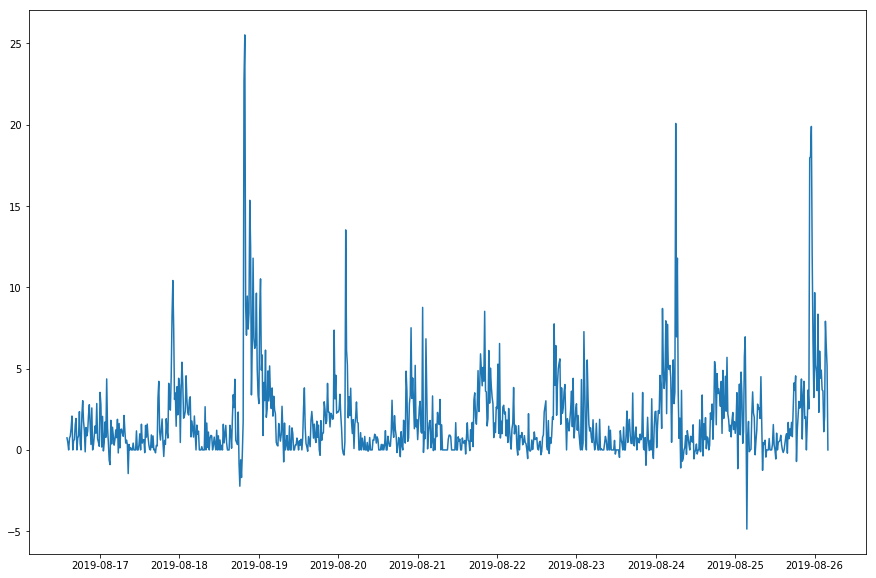

In [15]:
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
# tell pandas that the date column is the one we use for indexing (or x-axis)
series.set_index('date', inplace=True)

series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)

#Resolution set to quarter hour
newSeries = series.resample('.25H', how='sum')
# this plots and shows the time series
plt.figure(figsize = (15,10))
ax = plt.plot(newSeries)
plt.savefig("Sentiment_Over_Time.png")
plt.show()

In [16]:
#We use vader sentiment analysis, because as this is social media data it seems more applicable.

#This analysis allows us to use only tweets that contain specific words specified by user

def vaderSentimentAnalysisOnSpecific(sTweetsFilename, bPrint, tweetProcessor, stringList):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param sTweetsFilename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.
    @param stringList: List of words to use as search parameters
    
    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    # open file and process tweets, one by one
    with open(sTweetsFilename, 'r') as f:
        for line in f:
            # each line is loaded according to json format, into tweet, which is actually a dictionary
            tweet = json.loads(line)

            try:
                tweetText = tweet.get('text', '')
                tweetDate = tweet.get('created_at')
                # pre-process the tweet text
                lTokens = tweetProcessor.process(tweetText)

                if any(s in stringList for s in lTokens):
                    # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
                    # see lab sheet for what dSentimentScores holds
                    dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

                    # save the date and sentiment of each tweet (used for time series)
                    lSentiment.append([pd.to_datetime(tweetDate), dSentimentScores['compound']])

                    # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
                    # of positive and negative words, we cannot use colorama to label each token
                    if bPrint:
                        print(*lTokens, sep=', ')
                        for cat,score in dSentimentScores.items():
                            print('{0}: {1}, '.format(cat, score), end='')
                        print()

            except KeyError as e:
                pass


    return lSentiment

In [17]:
#Create lists of strings that contain the names of each of the starting pitchers

stringListFelix = ('felix', 'hernandez')
stringListGonzales = ('marco', 'gonzales')
stringListKikuchi = ('yusei', 'kikuchi')
stringListMilone = ('tommy', 'milone')
stringListSheffield = ('justus', 'sheffield')
stringListStartingPitchers = ('felix', 'hernandez', 'marco', 'gonzales', 'yusei', 'kikuchi', 'tommy', 'milone', 'justus', 'sheffield')

In [18]:
#Create sentiment for each pitchers related tweets

lSentimentFelix = vaderSentimentAnalysisOnSpecific(tweetsFile, False, tweetProcessor, stringListFelix)
lSentimentGonzales = vaderSentimentAnalysisOnSpecific(tweetsFile, False, tweetProcessor, stringListGonzales)
lSentimentKikuchi = vaderSentimentAnalysisOnSpecific(tweetsFile, False, tweetProcessor, stringListKikuchi)
lSentimentMilone = vaderSentimentAnalysisOnSpecific(tweetsFile, False, tweetProcessor, stringListMilone)
lSentimentListSheffield = vaderSentimentAnalysisOnSpecific(tweetsFile, False, tweetProcessor, stringListSheffield)
lSentimentStartingPitchers = vaderSentimentAnalysisOnSpecific(tweetsFile, False, tweetProcessor, stringListStartingPitchers)

In [19]:
#This Function creates a figure with multiple subplots of sentiment of tweets over time that contain
#specific words given in the sentList. sentTitles is the titles to be used for each subplot. The fileName
#is the name of the file we save the figure as.

def plotSentList(sentList, sentTitles, fileName):
    """
    Creates figure with multiple subplots of sentiment over time

    @param sentList: list of multiple sentiment scores over periods of times
    @param sentTitles: corresponding titles for each plot
    @param fileName: name of file where figure will be saved
    
    @returns: figure of subplots
    """
    
    plotColNum = 2
    plotRowNum = math.ceil(len(sentList)/2)
    i = 0
    plt.figure(figsize=(25,20))
    for sent in sentList:
        i+=1
        series = pd.DataFrame(sent, columns=['date', 'sentiment'])
        series.set_index('date', inplace=True)

        series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)
    
        newSeries = series.resample('.25H', how='sum')
        ax = plt.subplot(plotRowNum, plotColNum, i)
        ax.set_title(sentTitles[i-1])
        ax.plot(newSeries)
        
    plt.savefig(fileName)
    plt.show()

In [20]:
#We compare the sentiment towards each of the starting pitchers.

lSentimentPitchersList = (lSentimentFelix, lSentimentGonzales, lSentimentKikuchi, lSentimentMilone,
                          lSentimentListSheffield, lSentimentStartingPitchers)
pitchersTitles = ("Felix Hernandez", "Marco Gonzales", "Yusei Kikuchi", "Tommy Milone", "Justus Sheffield", "All Starting Pitchers")

pitcherFile = "StartingPitcherSent.png"

C:\Users\thisisrickym\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


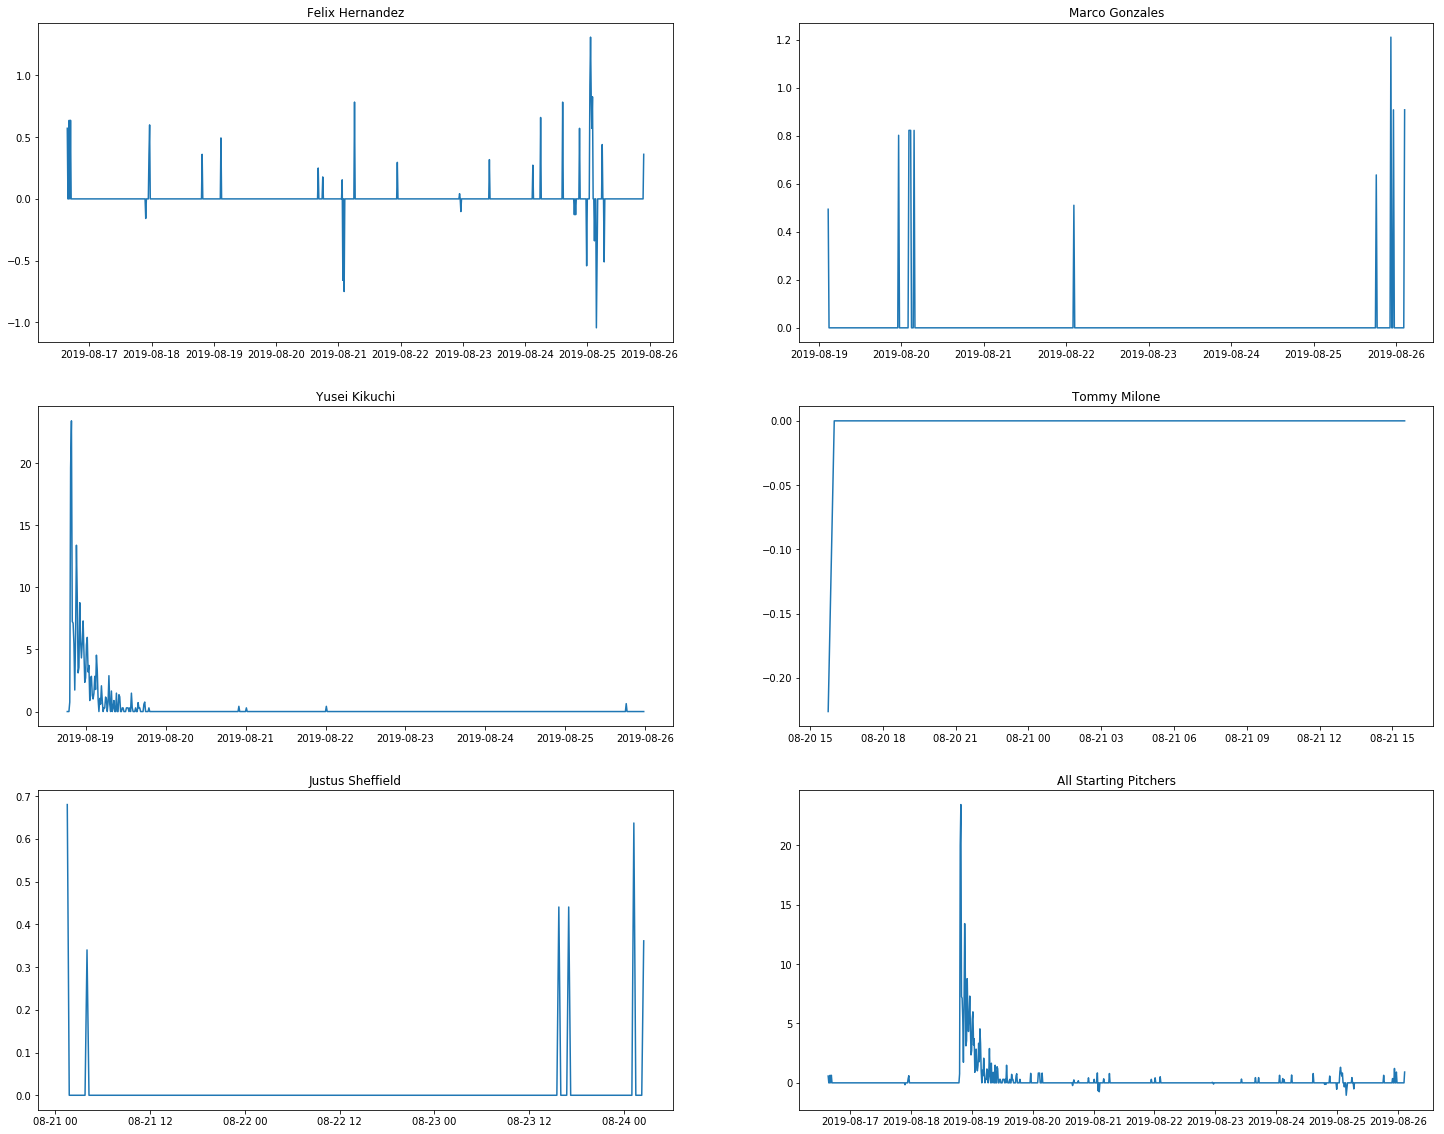

In [21]:
plotSentList(lSentimentPitchersList, pitchersTitles, pitcherFile)


# Topic Modelling

In [22]:
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np
import math

from tweepy import Cursor
from tweepy import api
import pyLDAvis.sklearn
from wordcloud import WordCloud

from argparse import ArgumentParser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

In [23]:
def process(text, tokenizer=TweetTokenizer(), stopwords = []):
    """
    Perform the processing
    
    @param text: the text (tweet) to process
    @param tokeniser: tokeniser to use.
    @param stopwords: list of stopwords to use.

    @returns: list of (valid) tokens in text
    """
    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)


    # remove stopwords, digits
    return [tok for tok in lTokens if tok not in stopwords and not tok.isdigit()]

In [24]:
tweetTokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopwordList = stopwords.words('english') + punct + ['rt', 'via', '...', '...', ':', '@', '…']

lTweets = []


with open(fJsonName, 'r') as f:
    for line in f:
        # each line is loaded according to json format, into tweet, which is actually a dictionary
        tweet = json.loads(line)
        tweetText = tweet.get('text', '')
        #next removes all url links
        tweetText = re.sub(r"http\S+", "", tweetText)
        lTokens = process(text=tweetText, tokenizer=tweetTokenizer, stopwords=stopwordList)

        lTweets.append(' '.join(lTokens))
        


In [25]:
#
# LDA parameters
#

# number of topics to discover (default = 10)
topicNum = 12
# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 15
# this is the number of features/words to used to describe our documents
# please feel free to change to see effect
featureNum = 5000

In [26]:
"""
Performs counting via CountVectorizer and then apply the LDA model.
"""

#
# Count Vectorizer
#

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lTweets)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names()


#
# LDA MODEL
#

# Run LDA (see documentation about what the arguments means)
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [27]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [28]:
#
# Diplays discovered topics
#

display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
yusei truetotheblue kikuchi shutout game complete mlb yuseik18 maddux nola austin toronto got félix august
Topic 1:
pitches good week mlb yesterday raysbaseball mlbpipeline tigers angels whitesox matt topsheff42 reds cubs mallex
Topic 2:
gomariners seager kyle lead win truetotheblue work garyhilljr gets gem earn spins early save game
Topic 3:
night vs kelenic wv_power everettaquasox bluejays final thanks love jarred truetotheblue mlbpipeline right joshhortonedh things
Topic 4:
realkingfelix mlbstats throws 28 fewest 06 jake rays king games start return way crawford taylor
Topic 5:
bluejays time run players season home weekend brilliant fan bahlahkaay tworsandtwols better stalinfanacc bardown jau85311632
Topic 6:
win blue jays series seven delivered smashed summer nearly マリナーズ kick hr punchouts frames lift
Topic 7:
modestonuts runs know home artravs history rainiersland griffey jay mlbpipeline gregjohnsmlb lamalam94862771 making truetothebue rodriguez
Topic 8:
day today tom mur

In [29]:
panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\thisisrickym\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [30]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    # TODO: complete the implementation
    
    #
    # Answer to Exercises 3 and 4
    #
    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    plt.figure(figsize = (25, 20))
    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='white')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.savefig("wordcloud.png")
    plt.show(block=True)

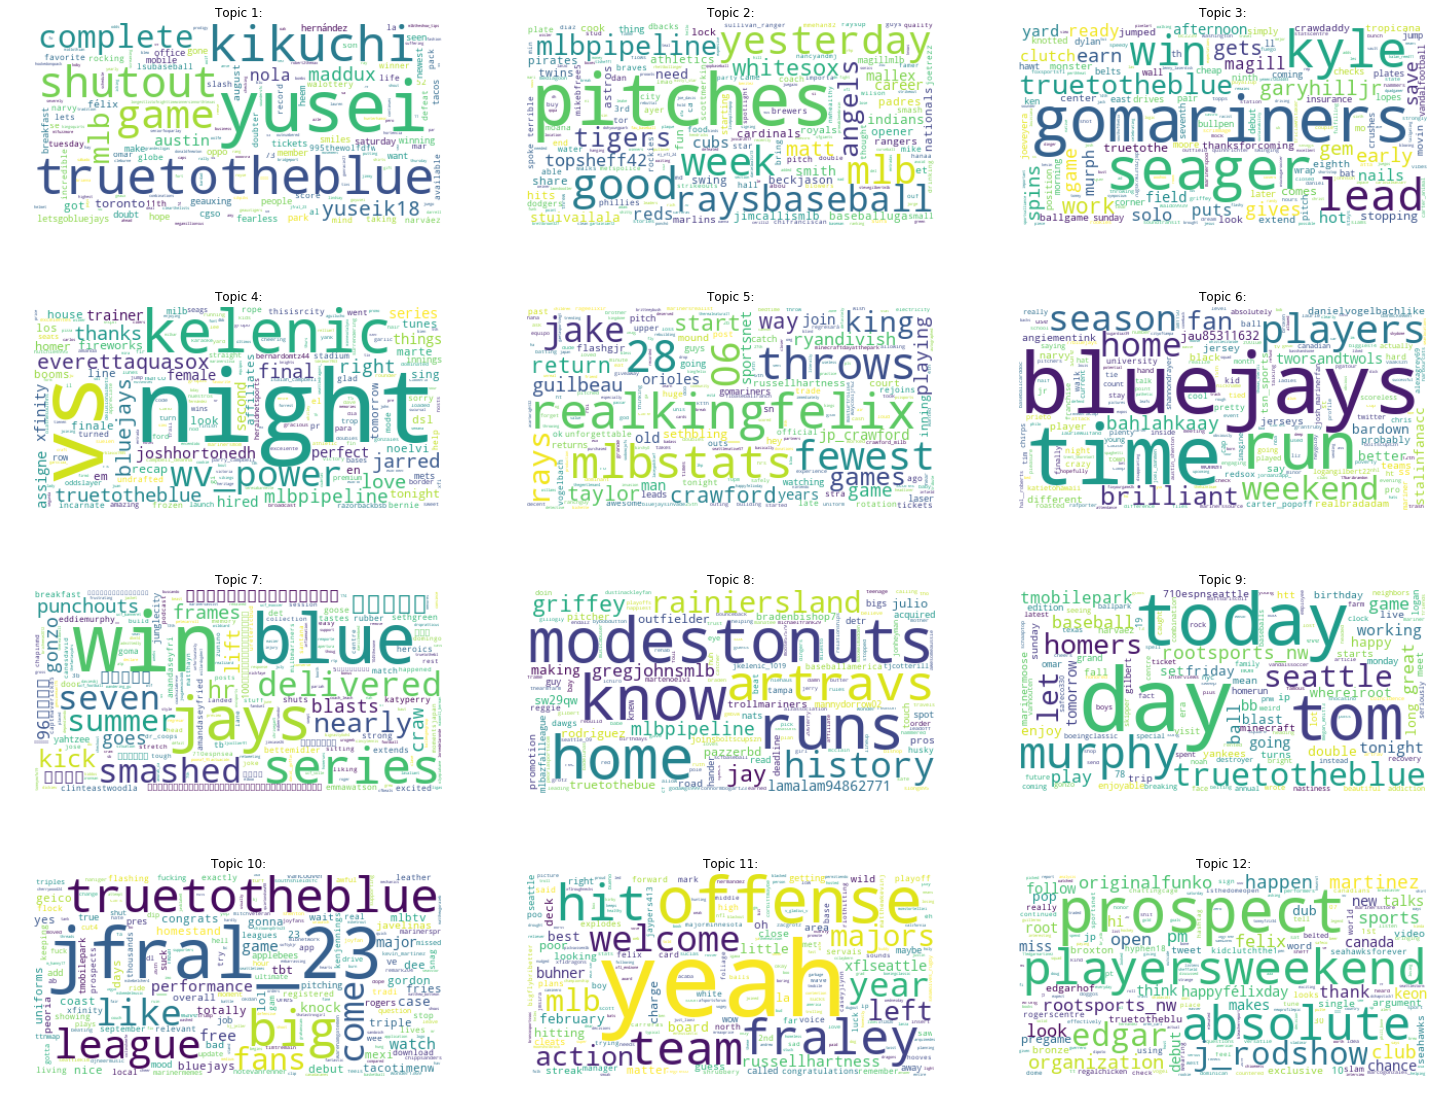

In [31]:
displayWordcloud(ldaModel, tfFeatureNames)